In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the Data set for Sparkling Wine
Sparkling = pd.read_csv("C:/Users/Vidhut Sharma/Documents/PRojectsGivenByGL/Sparkling.csv",parse_dates=["YearMonth"],index_col="YearMonth")

In [3]:
#Reading the Data set for Rose Wine
Rose = pd.read_csv("C:/Users/Vidhut Sharma/Documents/PRojectsGivenByGL/Rose.csv",parse_dates=["YearMonth"],index_col="YearMonth")

In [4]:
Sparkling.head(10)


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
1980-06-01,1377
1980-07-01,1966
1980-08-01,2453
1980-09-01,1984


In [6]:
Sparkling = pd.read_csv("C:/Users/Vidhut Sharma/Documents/PRojectsGivenByGL/Sparkling.csv")

In [17]:
Sparkling["YearMonth"]

0      1980-01
1      1980-02
2      1980-03
3      1980-04
4      1980-05
        ...   
182    1995-03
183    1995-04
184    1995-05
185    1995-06
186    1995-07
Name: YearMonth, Length: 187, dtype: object

In [24]:

dataset = {'Group': ['G-2', 'G-3', 'G-3', 'G-2', 'G-2', 
                     'G-2', 'G-3', 'G-1', 'G-1', 'G-2'],
             
           'Date': ['2019-11-04', '2020-05-17', '2020-12-12', 
                    '2019-10-15', '2019-01-31', '2019-02-13',
                    '2020-12-25', '2018-06-01', '2018-07-15',
                    '2019-09-14']}
  
dataset = pd.DataFrame(dataset, columns=['Group', 'Date'])
  
# using groupby() function on Group column
df = dataset.groupby(['Group'])
  
# using agg() function on Date column
df2 = df.agg(Minimum_Date=('Date', np.min), Maximum_Date=('Date', np.max))
  
# Displaying result
#display(df2)
df2["Minimum_Date"][0]

'2018-06-01'

In [5]:
Rose.head(10)

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
1980-06-01,168.0
1980-07-01,118.0
1980-08-01,129.0
1980-09-01,205.0


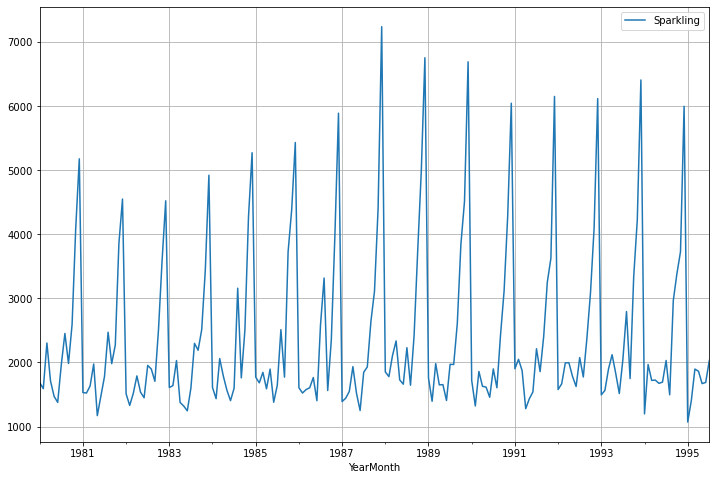

In [6]:
from pylab import rcParams
rcParams["figure.figsize"] = 12,8
Sparkling.plot()
plt.grid()

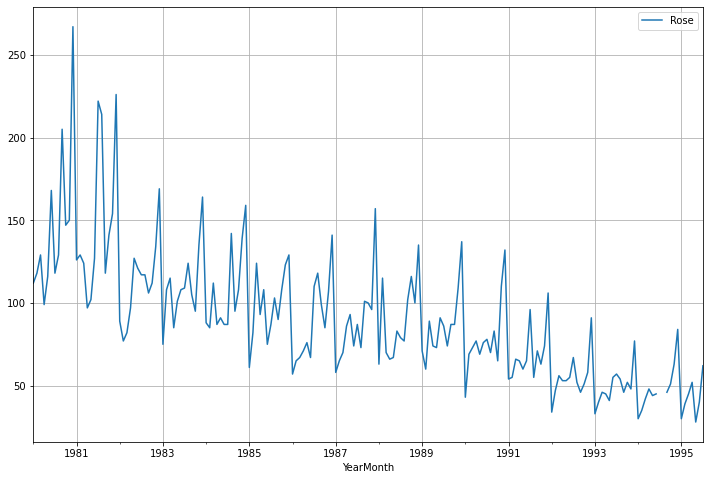

In [7]:
rcParams["figure.figsize"] = 12,8
Rose.plot()
plt.grid()

In [8]:
print(Sparkling.info())
print(Rose.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB
None


In [9]:
#Checking for the NULL Values 
print(Sparkling.isnull().sum())
print(Rose.isnull().sum())

Sparkling    0
dtype: int64
Rose    2
dtype: int64


In [10]:
Sparkling.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [11]:
Rose.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


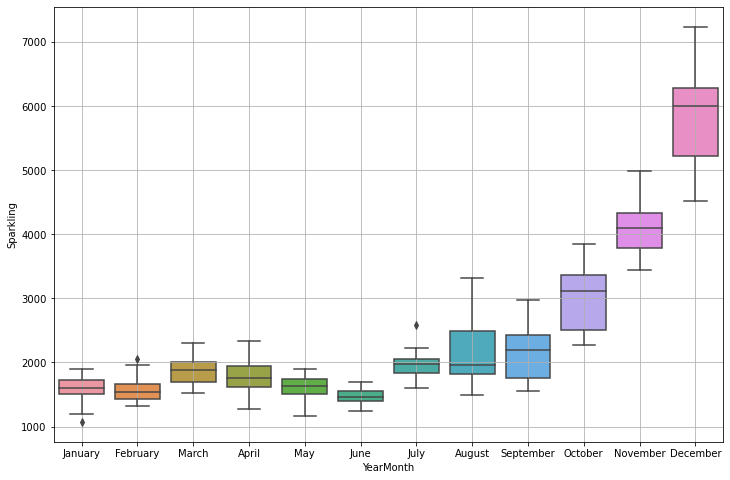

In [12]:
#Checking for the Outliers for each month for Sparkling Wine
from pylab import rcParams
rcParams["figure.figsize"] = 12,8
sns.boxplot(x = Sparkling.index.month_name() , y = Sparkling["Sparkling"])
plt.grid()

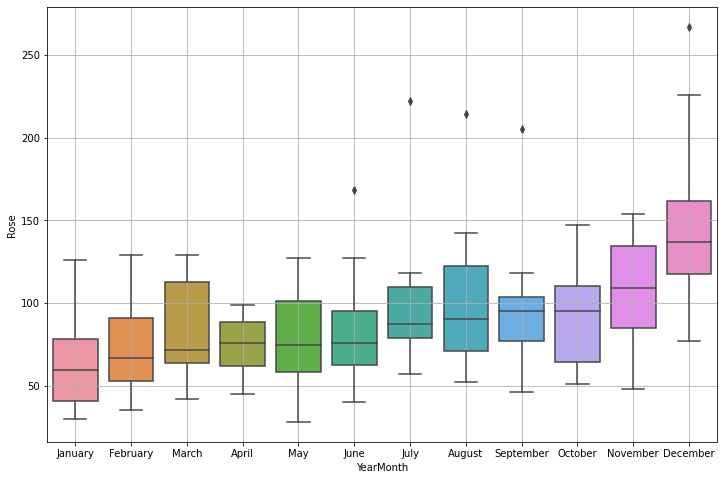

In [13]:
#Checking for the Outliers for each month for Rose Wine
from pylab import rcParams
rcParams["figure.figsize"] = 12,8
sns.boxplot(x = Sparkling.index.month_name() , y = Rose["Rose"])
plt.grid()

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
#Additive for Sparkling Wine
Sparkling_Decompose = seasonal_decompose(x = Sparkling,period = 12);

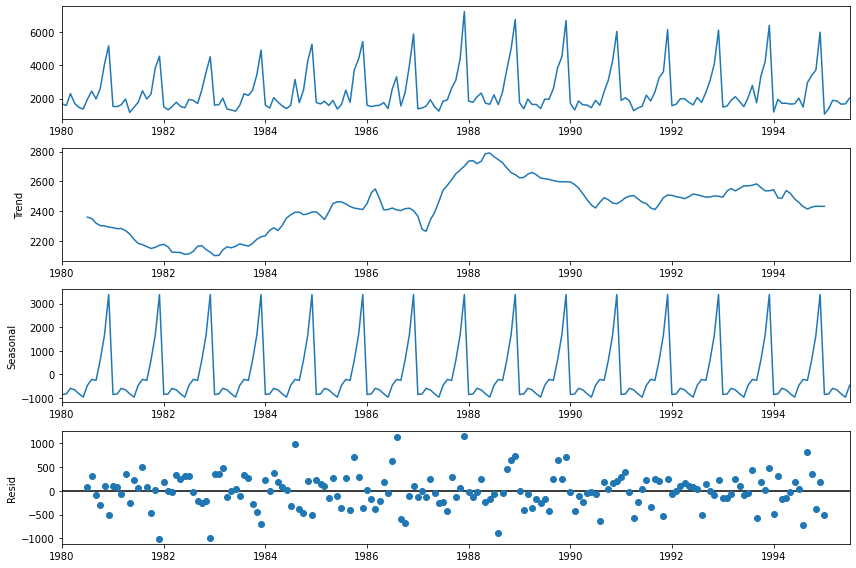

In [16]:
Sparkling_Decompose.plot()
plt.show()

In [17]:
#Multiplicative for Sparkling Wine
Sparkling_Decompose_Mul = seasonal_decompose(x = Sparkling,model = "mupltiplicative",period = 12);

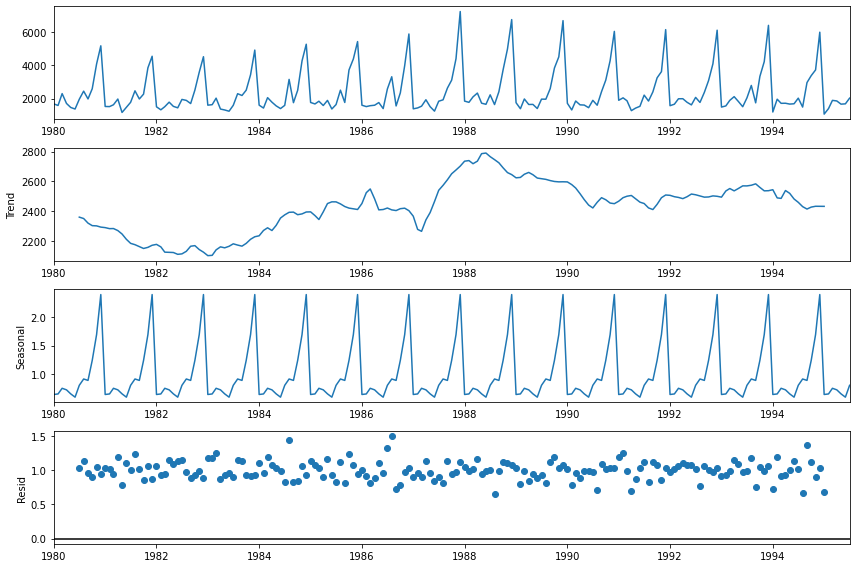

In [18]:
Sparkling_Decompose_Mul.plot()
plt.show()

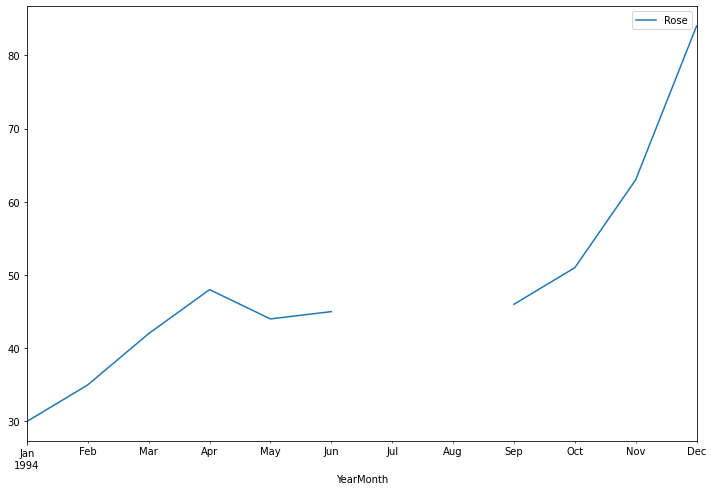

In [19]:
#As there are 2 missing values in the Rose data set we have to replace the data points with median or mode.We cannot use mean
#as there are outliers present.As we can check in the data set there is a gap in the plot so we can use either the the median
#or mode but the data points are missing from 1994 year and if we plot the graph only for 1994 we see that the graph is coming 
#kind of constant and in this case median and mode cannot be used as it can lead to outliers in the yearr of 1994 so we will be
#replacing the NA values with the number 45 as it will not spike the graph suddenly.
Rose.loc["1994-01-01" : "1994-12-01"].plot()
plt.show()
#np.where(Rose.isnull()== True , Rose.median())

In [20]:
#Replacing the NA values in 1994 with 45 
Rose.loc["1994-01-01" : "1994-12-01"]["Rose"] = np.where(Rose.loc["1994-01-01" : "1994-12-01"]["Rose"].isnull() == True , 45,Rose.loc["1994-01-01" : "1994-12-01"]["Rose"])

<ipython-input-20-e6a3217685ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rose.loc["1994-01-01" : "1994-12-01"]["Rose"] = np.where(Rose.loc["1994-01-01" : "1994-12-01"]["Rose"].isnull() == True , 45,Rose.loc["1994-01-01" : "1994-12-01"]["Rose"])


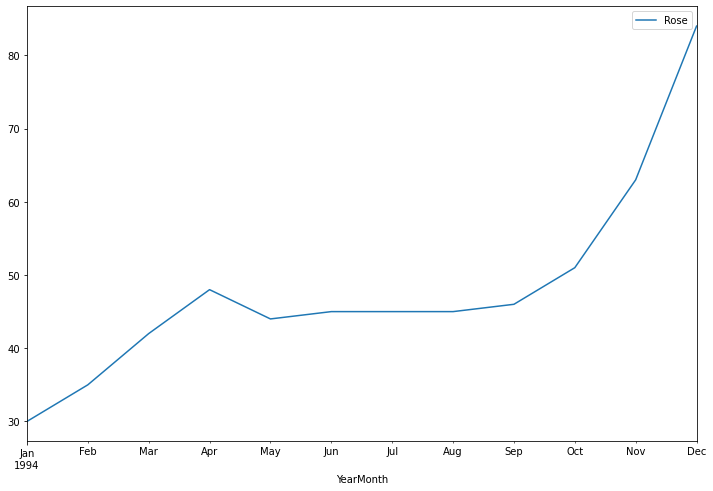

In [21]:
Rose.loc["1994-01-01" : "1994-12-01"].plot()
plt.show()

In [22]:
Rose_Decompose = seasonal_decompose(x = Rose,period = 12);

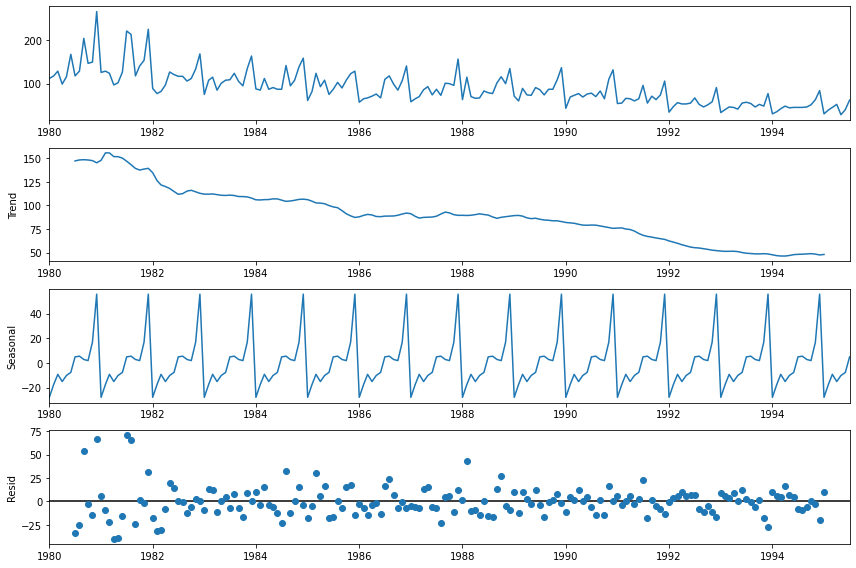

In [23]:
Rose_Decompose.plot()
plt.show()

In [24]:
#Splitting the data set into train and test
train_Sparkling = Sparkling.loc["1980-01-01": "1990-12-01"]
test_Sparkling = Sparkling.loc["1991-01-01" : "1995-07-01"]
train_Rose = Rose.loc["1980-01-01": "1990-12-01"]
test_Rose = Rose.loc["1991-01-01" : "1995-07-01"]

In [25]:
#Linear Regression for Sparkling and Rose
from sklearn.linear_model import LinearRegression

In [26]:
#Linear Regression Analysis for Sparkling 
train_time = [i+1 for i in range(len(train_Sparkling))]
print(train_time)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


In [27]:
test_time = [i+133 for i in range(len(test_Sparkling))]
print(test_time)

[133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [28]:
LinearRegression_train = train_Sparkling.copy()
LinearRegression_test = test_Sparkling.copy()

In [29]:
LinearRegression_train["time"] = train_time
LinearRegression_test["time"] = test_time

In [30]:
print(LinearRegression_train.head())
print(LinearRegression_test.head())
print(LinearRegression_train.tail())
print(LinearRegression_test.tail())

            Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5
            Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137
            Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132
            Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187


In [31]:
lr = LinearRegression()

In [32]:
lr.fit(LinearRegression_train[["time"]] , LinearRegression_train["Sparkling"])

LinearRegression()

In [33]:
train_predictForSparkling = lr.predict(LinearRegression_train[["time"]])
LinearRegression_train["RegOntime"] = train_predictForSparkling


In [34]:
test_predictForSparkling = lr.predict(LinearRegression_test[["time"]])
LinearRegression_test["RegOntime"] = test_predictForSparkling


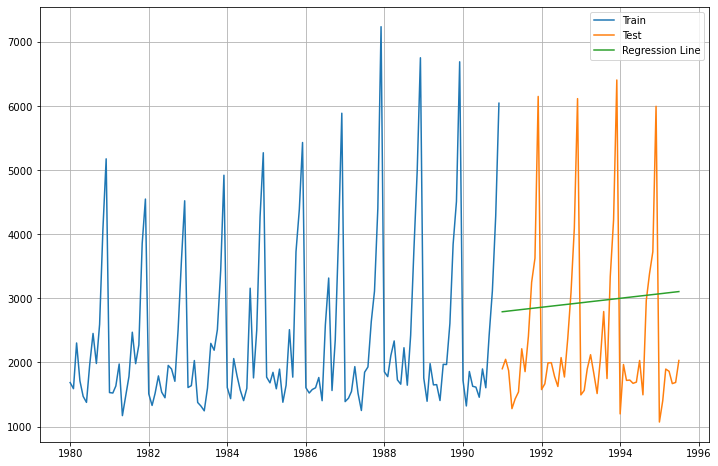

In [35]:
plt.plot(train_Sparkling["Sparkling"],label = "Train")
plt.plot(test_Sparkling["Sparkling"],label = "Test")
plt.plot(LinearRegression_test["RegOntime"] , label = "Regression Line")
plt.legend(loc = "best")
plt.grid()

In [36]:
LinearRegression_train = train_Rose.copy()
LinearRegression_test = test_Rose.copy()

In [37]:
LinearRegression_train["time"] = train_time
LinearRegression_test["time"] = test_time

In [38]:
print(LinearRegression_train.head())
print(LinearRegression_test.head())

             Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5
            Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137


In [39]:
lr.fit(LinearRegression_train[["time"]] , LinearRegression_train["Rose"])

LinearRegression()

In [40]:
train_predictForRose = lr.predict(LinearRegression_train[["time"]])
LinearRegression_train["RegOntime"] = train_predictForRose

In [41]:
test_predictForRose = lr.predict(LinearRegression_test[["time"]])
LinearRegression_test["RegOntime"] = test_predictForRose

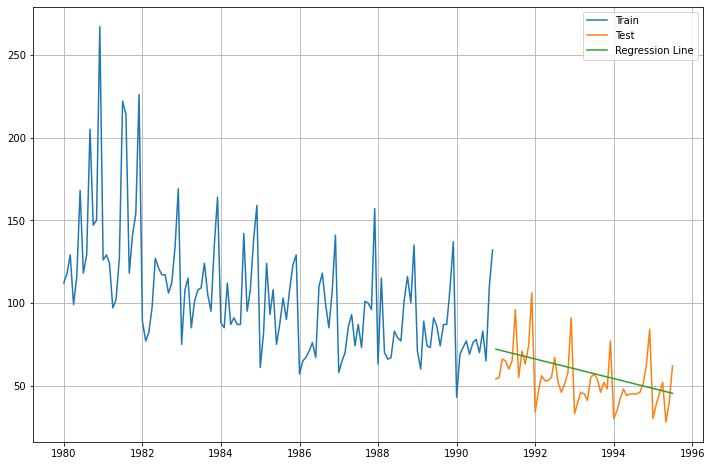

In [42]:
plt.plot(train_Rose["Rose"],label = "Train")
plt.plot(test_Rose["Rose"],label = "Test")
plt.plot(LinearRegression_test["RegOntime"] , label = "Regression Line")
plt.legend(loc = "best")
plt.grid()

In [43]:
from sklearn import metrics

In [44]:
rmseForLM_Sparkling = metrics.mean_squared_error(test_Sparkling["Sparkling"],test_predictForSparkling,squared=False)
rmseForLM_Rose = metrics.mean_squared_error(test_Rose["Rose"],test_predictForRose,squared=False)

In [45]:
ResultsForLM = pd.DataFrame({"Test RMSE For Sparkling" : [rmseForLM_Sparkling] , "Test RMSE For Rose" : [rmseForLM_Rose]},index=["Linear Regression Result"])

In [46]:
ResultsForLM

,Test RMSE For Sparkling,Test RMSE For Rose
Linear Regression Result,1389.135175,15.275732


In [47]:
NaiveBayes_train = train_Sparkling.copy()
NaiveBayes_test = test_Sparkling.copy()

In [48]:
NaiveBayes_test["naive"] = np.asarray(NaiveBayes_train["Sparkling"])[len(np.asarray(NaiveBayes_train["Sparkling"]))-1]
NaiveBayes_test["naive"].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

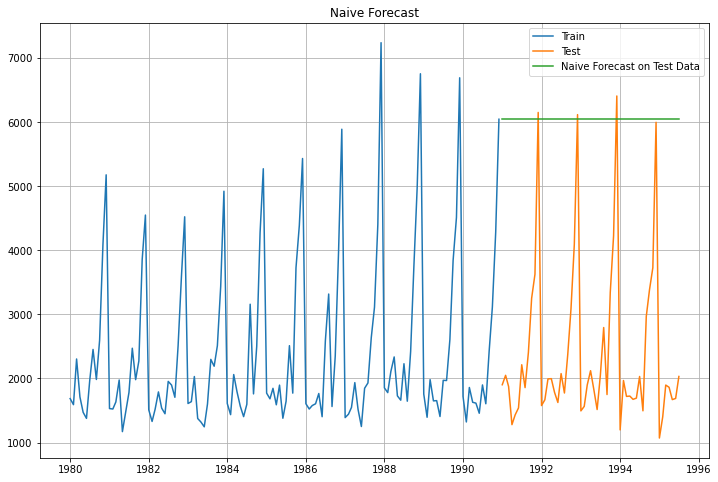

In [49]:
plt.plot(NaiveBayes_train["Sparkling"] , label = "Train")
plt.plot(test_Sparkling["Sparkling"] , label = "Test")
plt.plot(NaiveBayes_test["naive"],label = "Naive Forecast on Test Data")
plt.legend(loc= "best")
plt.title("Naive Forecast")
plt.grid()

In [50]:
rmseForNB_Sparkling = metrics.mean_squared_error(test_Sparkling["Sparkling"],NaiveBayes_test["naive"],squared=False)
rmseForNB_Sparkling

3864.2793518443914

In [51]:
NaiveBayes_train = train_Rose.copy()
NaiveBayes_test = test_Rose.copy()

In [52]:
NaiveBayes_test["naive"] = np.asarray(NaiveBayes_train["Rose"])[len(np.asarray(NaiveBayes_train["Rose"]))-1]
NaiveBayes_test["naive"].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

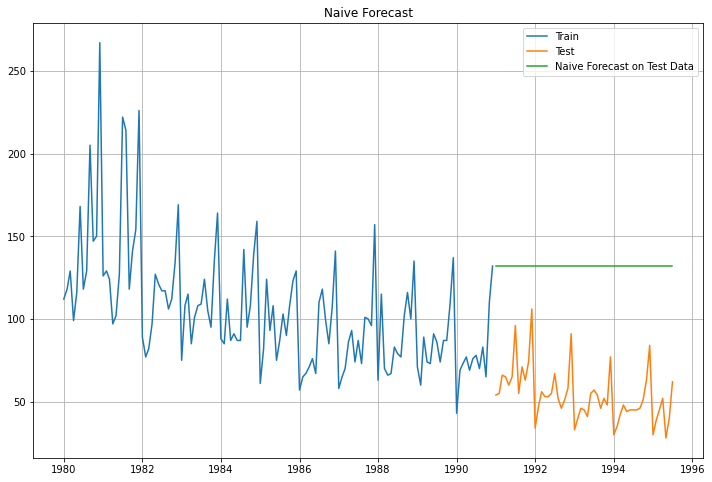

In [53]:
plt.plot(NaiveBayes_train["Rose"] , label = "Train")
plt.plot(test_Rose["Rose"] , label = "Test")
plt.plot(NaiveBayes_test["naive"],label = "Naive Forecast on Test Data")
plt.legend(loc= "best")
plt.title("Naive Forecast")
plt.grid()

In [54]:
rmseForNB_Rose = metrics.mean_squared_error(test_Rose["Rose"],NaiveBayes_test["naive"],squared=False)
rmseForNB_Rose

79.73855004724103

In [55]:
ResultsForNB = pd.DataFrame({"Test RMSE For Sparkling" : [rmseForNB_Sparkling] , "Test RMSE For Rose" : [rmseForNB_Rose]},index=["Naive Bayes Result"])

In [56]:
resultsDf = pd.concat([ResultsForLM , ResultsForNB])
resultsDf

,Test RMSE For Sparkling,Test RMSE For Rose
Linear Regression Result,1389.135175,15.275732
Naive Bayes Result,3864.279352,79.738550


In [57]:
SimpleAverage_train = train_Sparkling.copy()
SimpleAverage_test = test_Sparkling.copy()

In [58]:
SimpleAverage_test["mean_forecast"] = SimpleAverage_test["Sparkling"].mean()
SimpleAverage_test.head(15)

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2399.145455
1991-02-01,2049,2399.145455
1991-03-01,1874,2399.145455
1991-04-01,1279,2399.145455
1991-05-01,1432,2399.145455
1991-06-01,1540,2399.145455
1991-07-01,2214,2399.145455
1991-08-01,1857,2399.145455
1991-09-01,2408,2399.145455


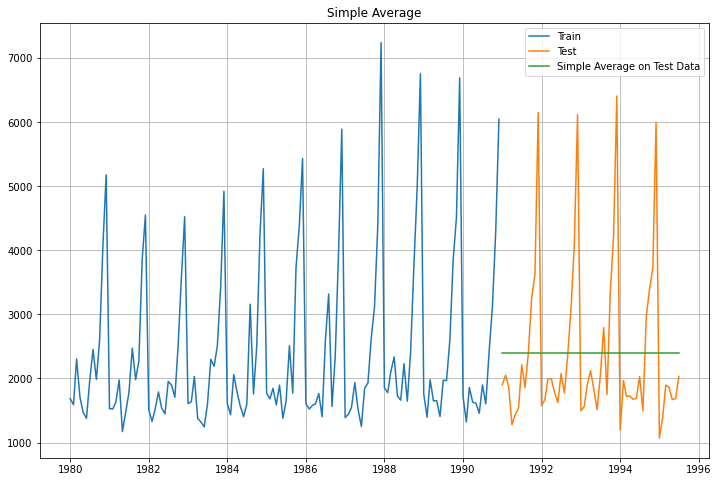

In [59]:
plt.plot(SimpleAverage_train["Sparkling"] , label = "Train")
plt.plot(SimpleAverage_test["Sparkling"] , label = "Test")
plt.plot(SimpleAverage_test["mean_forecast"] , label = "Simple Average on Test Data")
plt.legend(loc= "best")
plt.title("Simple Average")
plt.grid();

In [60]:
rmseForSM_Sparkling = metrics.mean_squared_error(test_Sparkling["Sparkling"],SimpleAverage_test["mean_forecast"],squared=False)
rmseForSM_Sparkling

1275.0733799658435

In [61]:
SimpleAverage_train = train_Rose.copy()
SimpleAverage_test = test_Rose.copy()

In [62]:
SimpleAverage_test["mean_forecast"] = SimpleAverage_test["Rose"].mean()
SimpleAverage_test.head(15)

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,53.836364
1991-02-01,55.0,53.836364
1991-03-01,66.0,53.836364
1991-04-01,65.0,53.836364
1991-05-01,60.0,53.836364
1991-06-01,65.0,53.836364
1991-07-01,96.0,53.836364
1991-08-01,55.0,53.836364
1991-09-01,71.0,53.836364


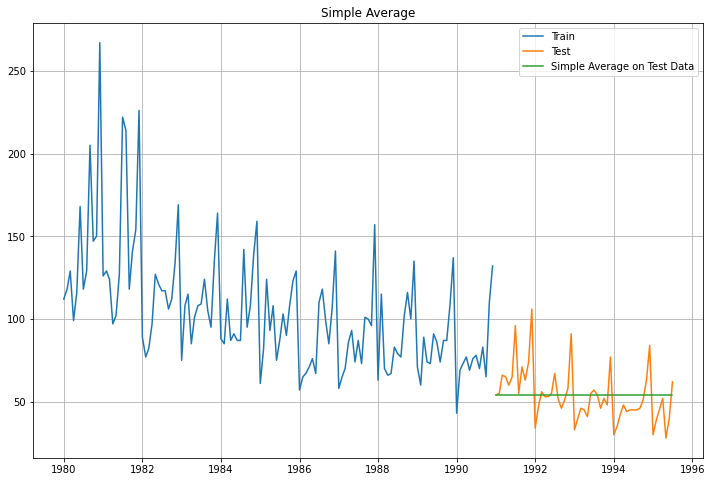

In [63]:
plt.plot(SimpleAverage_train["Rose"] , label = "Train")
plt.plot(SimpleAverage_test["Rose"] , label = "Test")
plt.plot(SimpleAverage_test["mean_forecast"] , label = "Simple Average on Test Data")
plt.legend(loc= "best")
plt.title("Simple Average")
plt.grid();

In [64]:
rmseForSM_Rose = metrics.mean_squared_error(test_Rose["Rose"],SimpleAverage_test["mean_forecast"],squared=False)
rmseForSM_Rose

15.769664360714428

In [65]:
ResultsForSM = pd.DataFrame({"Test RMSE For Sparkling" : [rmseForSM_Sparkling] , "Test RMSE For Rose" : [rmseForSM_Rose]},index=["Simple Average Result"])
resultsDf = pd.concat([resultsDf ,ResultsForSM])
resultsDf

,Test RMSE For Sparkling,Test RMSE For Rose
Linear Regression Result,1389.135175,15.275732
Naive Bayes Result,3864.279352,79.738550
Simple Average Result,1275.073380,15.769664


In [66]:
from statsmodels.tsa.api import ExponentialSmoothing , SimpleExpSmoothing,Holt

In [67]:
#Simple Exponential Smoothning For Rose and Sparkling Wine
SES_Sparkling = SimpleExpSmoothing(train_Sparkling , initialization_method="estimated")

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [68]:
SES_Sparkling_autofit = SES_Sparkling.fit(optimized=True)

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [69]:
SES_Sparkling_autofit.params

{'smoothing_level': 0.07029459943040381,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.1004162520212,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [70]:
SES_Sparkling_predict = SES_Sparkling_autofit.forecast(steps = len(test_Sparkling))
SES_Sparkling_predict

1991-01-01    2804.687529
1991-02-01    2804.687529
1991-03-01    2804.687529
1991-04-01    2804.687529
1991-05-01    2804.687529
1991-06-01    2804.687529
1991-07-01    2804.687529
1991-08-01    2804.687529
1991-09-01    2804.687529
1991-10-01    2804.687529
1991-11-01    2804.687529
1991-12-01    2804.687529
1992-01-01    2804.687529
1992-02-01    2804.687529
1992-03-01    2804.687529
1992-04-01    2804.687529
1992-05-01    2804.687529
1992-06-01    2804.687529
1992-07-01    2804.687529
1992-08-01    2804.687529
1992-09-01    2804.687529
1992-10-01    2804.687529
1992-11-01    2804.687529
1992-12-01    2804.687529
1993-01-01    2804.687529
1993-02-01    2804.687529
1993-03-01    2804.687529
1993-04-01    2804.687529
1993-05-01    2804.687529
1993-06-01    2804.687529
1993-07-01    2804.687529
1993-08-01    2804.687529
1993-09-01    2804.687529
1993-10-01    2804.687529
1993-11-01    2804.687529
1993-12-01    2804.687529
1994-01-01    2804.687529
1994-02-01    2804.687529
1994-03-01  

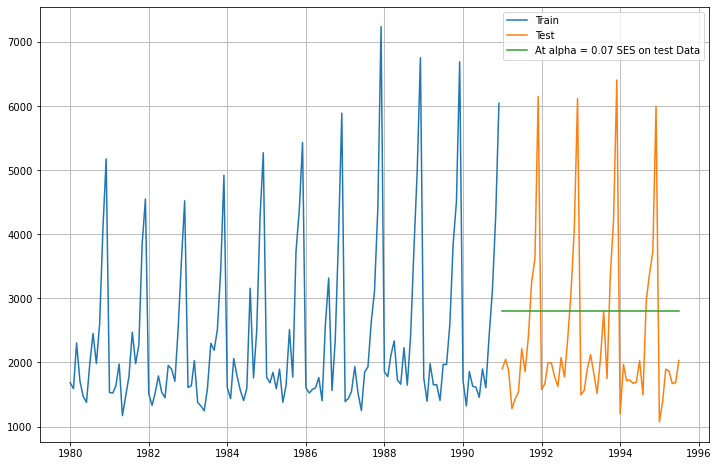

In [71]:
plt.plot(train_Sparkling , label = "Train")
plt.plot(test_Sparkling , label = "Test")
plt.plot(SES_Sparkling_predict , label = "At alpha = 0.07 SES on test Data")
plt.legend(loc = "best")
plt.grid()
plt.show()

In [72]:
rmseForSES_Sparkling = metrics.mean_squared_error(test_Sparkling["Sparkling"],SES_Sparkling_predict.values,squared=False)
rmseForSES_Sparkling

1338.0121443910186

In [73]:
#SES for Rose Wine
SES_Rose = SimpleExpSmoothing(train_Rose , initialization_method="estimated")

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [74]:
SES_Rose_autofit = SES_Rose.fit(optimized=True)

In [75]:
SES_Rose_autofit.params

{'smoothing_level': 0.09874933517484011,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38703609891138,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
SES_Rose_predict = SES_Rose_autofit.forecast(steps = len(test_Rose))
SES_Rose_predict

1991-01-01    87.104984
1991-02-01    87.104984
1991-03-01    87.104984
1991-04-01    87.104984
1991-05-01    87.104984
1991-06-01    87.104984
1991-07-01    87.104984
1991-08-01    87.104984
1991-09-01    87.104984
1991-10-01    87.104984
1991-11-01    87.104984
1991-12-01    87.104984
1992-01-01    87.104984
1992-02-01    87.104984
1992-03-01    87.104984
1992-04-01    87.104984
1992-05-01    87.104984
1992-06-01    87.104984
1992-07-01    87.104984
1992-08-01    87.104984
1992-09-01    87.104984
1992-10-01    87.104984
1992-11-01    87.104984
1992-12-01    87.104984
1993-01-01    87.104984
1993-02-01    87.104984
1993-03-01    87.104984
1993-04-01    87.104984
1993-05-01    87.104984
1993-06-01    87.104984
1993-07-01    87.104984
1993-08-01    87.104984
1993-09-01    87.104984
1993-10-01    87.104984
1993-11-01    87.104984
1993-12-01    87.104984
1994-01-01    87.104984
1994-02-01    87.104984
1994-03-01    87.104984
1994-04-01    87.104984
1994-05-01    87.104984
1994-06-01    87

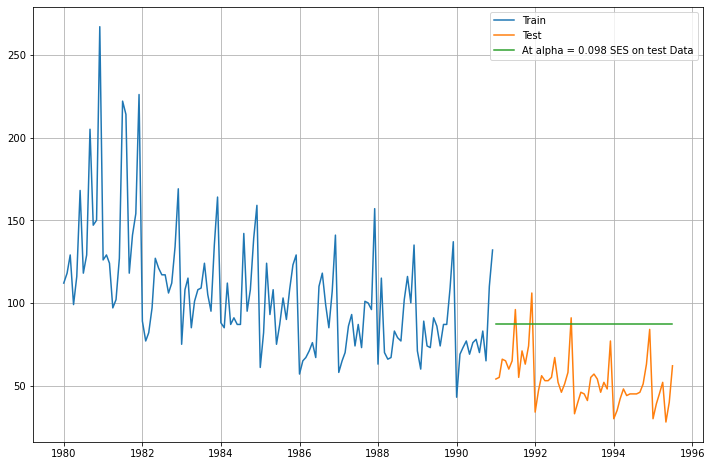

In [77]:
plt.plot(train_Rose , label = "Train")
plt.plot(test_Rose , label = "Test")
plt.plot(SES_Rose_predict , label = "At alpha = 0.098 SES on test Data")
plt.legend(loc = "best")
plt.grid()
plt.show()

In [78]:
rmseForSES_Rose = metrics.mean_squared_error(test_Rose["Rose"],SES_Rose_predict.values,squared=False)
rmseForSES_Rose

36.81688991653901

In [79]:
ResultsForSES = pd.DataFrame({"Test RMSE For Sparkling" : [rmseForSES_Sparkling] , "Test RMSE For Rose" : [rmseForSES_Rose]},index=["Simple Exponential Result"])
resultsDf = pd.concat([resultsDf ,ResultsForSES])
resultsDf

,Test RMSE For Sparkling,Test RMSE For Rose
Linear Regression Result,1389.135175,15.275732
Naive Bayes Result,3864.279352,79.738550
Simple Average Result,1275.073380,15.769664
Simple Exponential Result,1338.012144,36.816890


In [80]:
#Double Exponential Smoothning
DES_Sparkling = Holt(train_Sparkling , initialization_method="estimated")

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [81]:
DES_Sparkling = DES_Sparkling.fit()
DES_Sparkling.params

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.6638769092832238,
 'smoothing_trend': 9.966251357628782e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.5681711003654,
 'initial_trend': 29.020225552837097,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [82]:
DES_Sparkling_predict = DES_Sparkling.forecast(len(test_Sparkling))
DES_Sparkling_predict

1991-01-01    5330.501799
1991-02-01    5359.520204
1991-03-01    5388.538609
1991-04-01    5417.557013
1991-05-01    5446.575418
1991-06-01    5475.593823
1991-07-01    5504.612228
1991-08-01    5533.630633
1991-09-01    5562.649038
1991-10-01    5591.667443
1991-11-01    5620.685847
1991-12-01    5649.704252
1992-01-01    5678.722657
1992-02-01    5707.741062
1992-03-01    5736.759467
1992-04-01    5765.777872
1992-05-01    5794.796277
1992-06-01    5823.814682
1992-07-01    5852.833086
1992-08-01    5881.851491
1992-09-01    5910.869896
1992-10-01    5939.888301
1992-11-01    5968.906706
1992-12-01    5997.925111
1993-01-01    6026.943516
1993-02-01    6055.961920
1993-03-01    6084.980325
1993-04-01    6113.998730
1993-05-01    6143.017135
1993-06-01    6172.035540
1993-07-01    6201.053945
1993-08-01    6230.072350
1993-09-01    6259.090754
1993-10-01    6288.109159
1993-11-01    6317.127564
1993-12-01    6346.145969
1994-01-01    6375.164374
1994-02-01    6404.182779
1994-03-01  

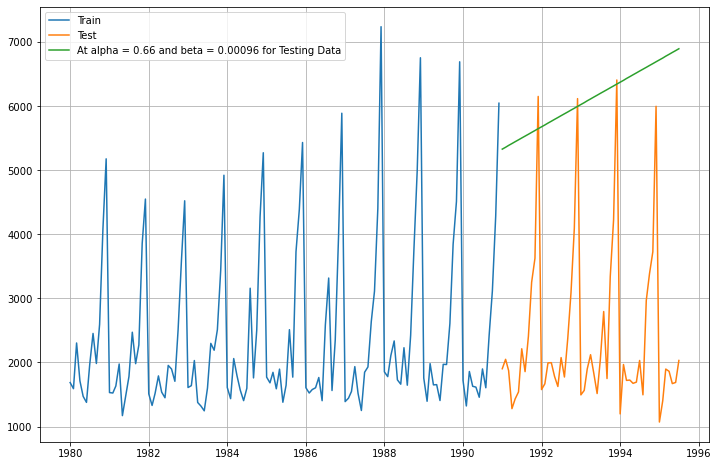

In [83]:
plt.plot(train_Sparkling , label= "Train")
plt.plot(test_Sparkling , label= "Test")
plt.plot(DES_Sparkling_predict , label= "At alpha = 0.66 and beta = 0.00096 for Testing Data")
plt.legend(loc = "best")
plt.grid()

In [84]:
rmseForHolt_Sparkling = metrics.mean_squared_error(test_Sparkling["Sparkling"] ,DES_Sparkling_predict.values , squared=False)
rmseForHolt_Sparkling

3949.993290409098

In [85]:
#Double Exponential For Rose
DES_Rose = Holt(train_Rose , initialization_method = "estimated")


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [86]:
DES_Rose = DES_Rose.fit()
DES_Rose.params

{'smoothing_level': 1.9086427682180844e-08,
 'smoothing_trend': 7.302464353829351e-09,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81629861505857,
 'initial_trend': -0.4943753249082896,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [87]:
DES_Rose_predict = DES_Rose.forecast(len(test_Rose))
DES_Rose_predict

1991-01-01    72.064380
1991-02-01    71.570005
1991-03-01    71.075630
1991-04-01    70.581254
1991-05-01    70.086879
1991-06-01    69.592504
1991-07-01    69.098128
1991-08-01    68.603753
1991-09-01    68.109378
1991-10-01    67.615002
1991-11-01    67.120627
1991-12-01    66.626252
1992-01-01    66.131877
1992-02-01    65.637501
1992-03-01    65.143126
1992-04-01    64.648751
1992-05-01    64.154375
1992-06-01    63.660000
1992-07-01    63.165625
1992-08-01    62.671249
1992-09-01    62.176874
1992-10-01    61.682499
1992-11-01    61.188123
1992-12-01    60.693748
1993-01-01    60.199373
1993-02-01    59.704997
1993-03-01    59.210622
1993-04-01    58.716247
1993-05-01    58.221871
1993-06-01    57.727496
1993-07-01    57.233121
1993-08-01    56.738745
1993-09-01    56.244370
1993-10-01    55.749995
1993-11-01    55.255619
1993-12-01    54.761244
1994-01-01    54.266869
1994-02-01    53.772493
1994-03-01    53.278118
1994-04-01    52.783743
1994-05-01    52.289367
1994-06-01    51

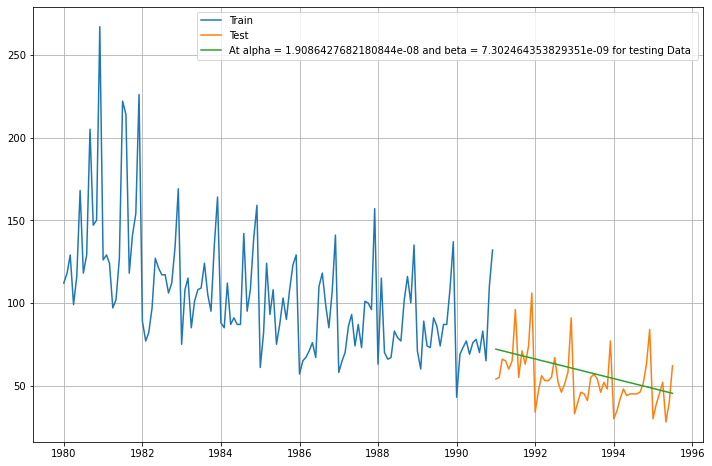

In [88]:
plt.plot(train_Rose , label = "Train")
plt.plot(test_Rose , label = "Test")
plt.plot(DES_Rose_predict , label = "At alpha = 1.9086427682180844e-08 and beta = 7.302464353829351e-09 for testing Data ")
plt.legend(loc= "best")
plt.grid()


In [89]:
rmseForHolt_Rose = metrics.mean_squared_error(test_Rose["Rose"] ,DES_Rose_predict.values,squared=False)
rmseForHolt_Rose

15.276105562580701

In [90]:
ResultsForDES = pd.DataFrame({"Test RMSE For Sparkling" : [rmseForHolt_Sparkling] , "Test RMSE For Rose" : [rmseForHolt_Rose]},index=["Double Exponential Result"])
resultsDf = pd.concat([resultsDf ,ResultsForDES])
resultsDf

,Test RMSE For Sparkling,Test RMSE For Rose
Linear Regression Result,1389.135175,15.275732
Naive Bayes Result,3864.279352,79.738550
Simple Average Result,1275.073380,15.769664
Simple Exponential Result,1338.012144,36.816890
Double Exponential Result,3949.993290,15.276106


In [91]:
#Exponential Smoothning For Sparkling
EXS_Sparkling = ExponentialSmoothing(train_Sparkling,trend="additive" , seasonal="additive" , initialization_method="estimated")

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [92]:
EXS_Sparkling = EXS_Sparkling.fit()

In [93]:
EXS_Sparkling.params

{'smoothing_level': 0.10005373820823961,
 'smoothing_trend': 0.010034490652580457,
 'smoothing_seasonal': 0.5095957543425532,
 'damping_trend': nan,
 'initial_level': 2364.584774604334,
 'initial_trend': -0.016752880078245408,
 'initial_seasons': array([-653.82559323, -736.67734144, -368.25456128, -483.63906084,
        -826.15467946, -832.96819741, -386.3751117 ,   91.82676187,
        -261.32455153,  265.38968222, 1580.26233564, 2619.56221896]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [94]:
EXS_Sparkling_Predict = EXS_Sparkling.forecast(len(test_Sparkling))
EXS_Sparkling_Predict 
len(EXS_Sparkling_Predict)

55

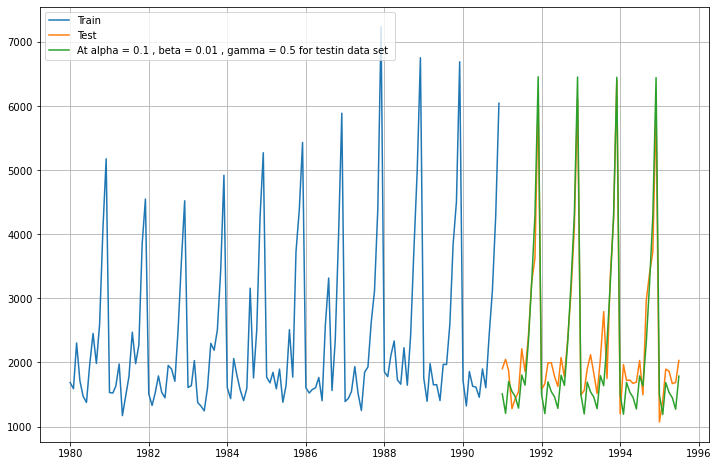

In [95]:
plt.plot(train_Sparkling , label = "Train")
plt.plot(test_Sparkling , label = "Test")
plt.plot(EXS_Sparkling_Predict , label = "At alpha = 0.1 , beta = 0.01 , gamma = 0.5 for testin data set ")
plt.legend(loc = "best")
plt.grid()

In [96]:
rmseForEXS_Sparkling = metrics.mean_squared_error(test_Sparkling["Sparkling"] , EXS_Sparkling_Predict.values , squared = False)
rmseForEXS_Sparkling 

379.6956857387101

In [97]:
#Exponential Smoothning for the Rose Wine
EXS_Rose = ExponentialSmoothing(train_Rose , trend="additive" , seasonal="additive" , initialization_method="estimated")
EXS_Rose = EXS_Rose.fit()

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [98]:
EXS_Rose.params

{'smoothing_level': 0.08830330642635406,
 'smoothing_trend': 6.730635331927582e-05,
 'smoothing_seasonal': 0.004455138229351625,
 'damping_trend': nan,
 'initial_level': 146.88752868155674,
 'initial_trend': -0.5492163940406024,
 'initial_seasons': array([-31.12207537, -18.81171138, -10.86052241, -21.52235816,
        -12.68359535,  -7.17529564,   2.7456236 ,   8.84900094,
          4.85724354,   2.9520333 ,  21.05004912,  63.29916317]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [99]:
EXS_Rose_Predict = EXS_Rose.forecast(len(test_Rose))
EXS_Rose_Predict

1991-01-01     42.672382
1991-02-01     54.439917
1991-03-01     61.841877
1991-04-01     50.636896
1991-05-01     58.918913
1991-06-01     63.870294
1991-07-01     73.240626
1991-08-01     78.790723
1991-09-01     74.257853
1991-10-01     71.805821
1991-11-01     89.354796
1991-12-01    131.072194
1992-01-01     36.081787
1992-02-01     47.849323
1992-03-01     55.251283
1992-04-01     44.046301
1992-05-01     52.328318
1992-06-01     57.279699
1992-07-01     66.650031
1992-08-01     72.200129
1992-09-01     67.667259
1992-10-01     65.215226
1992-11-01     82.764201
1992-12-01    124.481599
1993-01-01     29.491193
1993-02-01     41.258728
1993-03-01     48.660688
1993-04-01     37.455706
1993-05-01     45.737724
1993-06-01     50.689105
1993-07-01     60.059436
1993-08-01     65.609534
1993-09-01     61.076664
1993-10-01     58.624632
1993-11-01     76.173607
1993-12-01    117.891005
1994-01-01     22.900598
1994-02-01     34.668134
1994-03-01     42.070093
1994-04-01     30.865112


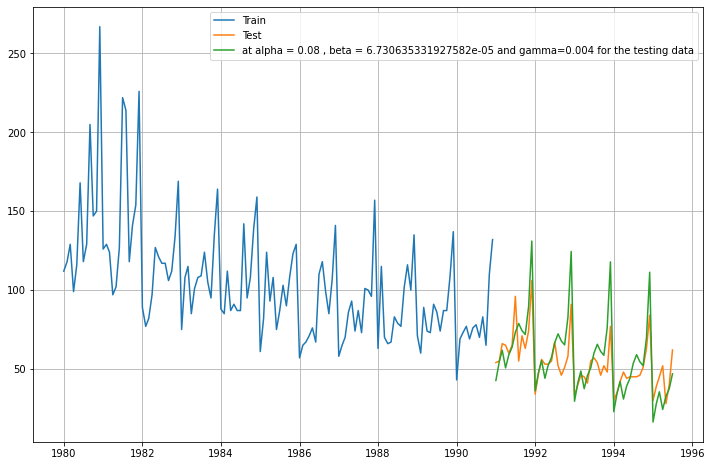

In [100]:
plt.plot(train_Rose , label = "Train")
plt.plot(test_Rose , label = "Test")
plt.plot(EXS_Rose_Predict , label = "at alpha = 0.08 , beta = 6.730635331927582e-05 and gamma=0.004 for the testing data")
plt.legend(loc = "best")
plt.grid()

In [101]:
rmseForEXS_Rose = metrics.mean_squared_error(test_Rose["Rose"] , EXS_Rose_Predict.values , squared=False)
rmseForEXS_Rose

14.280860283342175

In [102]:
ResultsForEXS = pd.DataFrame({"Test RMSE For Sparkling" : [rmseForEXS_Sparkling] , "Test RMSE For Rose" : [rmseForEXS_Rose]},index=["Exponential Smoothning Result"])
resultsDf = pd.concat([resultsDf ,ResultsForEXS])
resultsDf

,Test RMSE For Sparkling,Test RMSE For Rose
Linear Regression Result,1389.135175,15.275732
Naive Bayes Result,3864.279352,79.738550
Simple Average Result,1275.073380,15.769664
Simple Exponential Result,1338.012144,36.816890
Double Exponential Result,3949.993290,15.276106
Exponential Smoothning Result,379.695686,14.280860


In [103]:
from statsmodels.tsa.stattools import adfuller

In [104]:
#For Sparkling Wine
dftest_Sparkling = adfuller(x = Sparkling , regression="ct")
print('DF test statistic for Sparkling is %3.3f' %dftest_Sparkling[0])
print('DF test p-value for Sparkling is' ,dftest_Sparkling[1])
print('Number of lags used for Sparkling' ,dftest_Sparkling[2])

DF test statistic for Sparkling is -1.798
DF test p-value for Sparkling is 0.7055958459932035
Number of lags used for Sparkling 12


In [105]:
#As the Sparkling Wine Data suggests that the p value is > 0.5 which indicate that we fail to reject null hypotheses and our
#Null hypotheses says that the time series data is not stationart so in this case we have to use diff() to get the difference of
#the data and then check for the p value again

In [106]:
dftest_Sparkling = adfuller(x = Sparkling.diff().dropna() , regression="ct")
print('DF test statistic for Sparkling is %3.3f' %dftest_Sparkling[0])
print('DF test p-value for Sparkling is' ,dftest_Sparkling[1])
print('Number of lags used for Sparkling' ,dftest_Sparkling[2])

DF test statistic for Sparkling is -44.912
DF test p-value for Sparkling is 0.0
Number of lags used for Sparkling 10


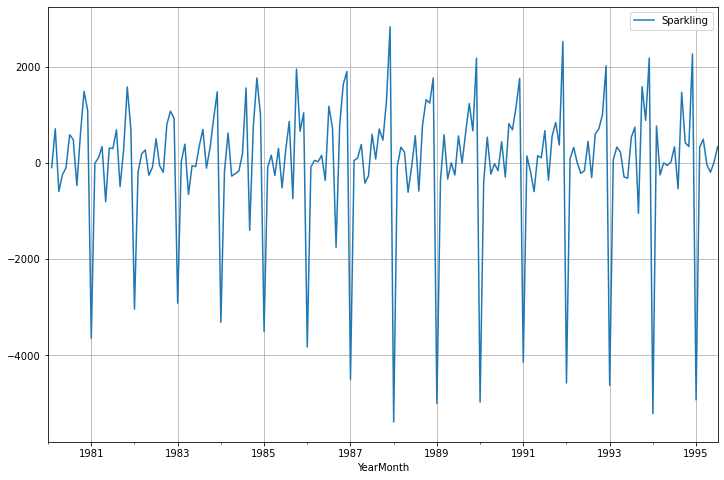

In [107]:
#Now the p value is 0 which is less than 0.05 so we reject null hypothesis 
Sparkling.diff().plot()
plt.grid()

In [108]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

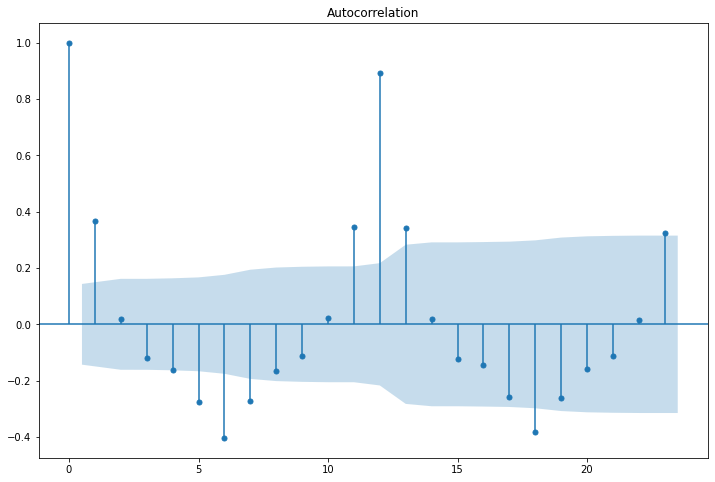

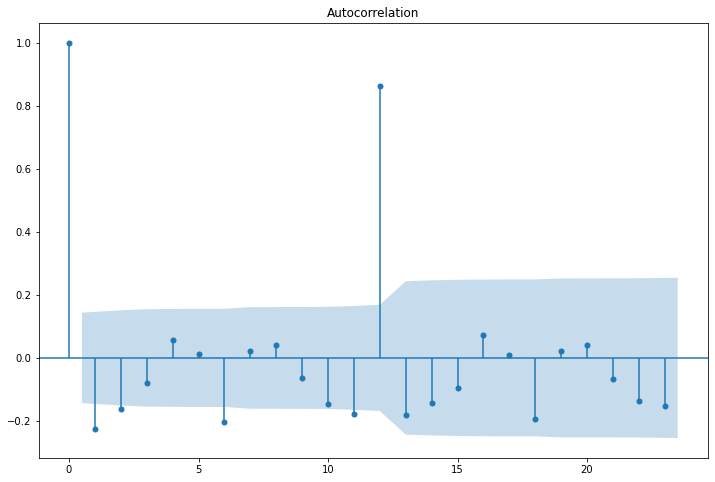

In [109]:
plot_acf(Sparkling,alpha=0.05);
plot_acf(Sparkling.diff().dropna(),alpha=0.05);

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


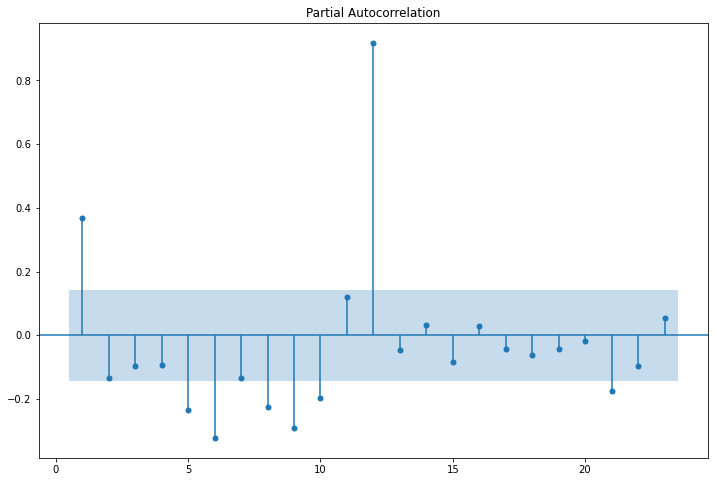

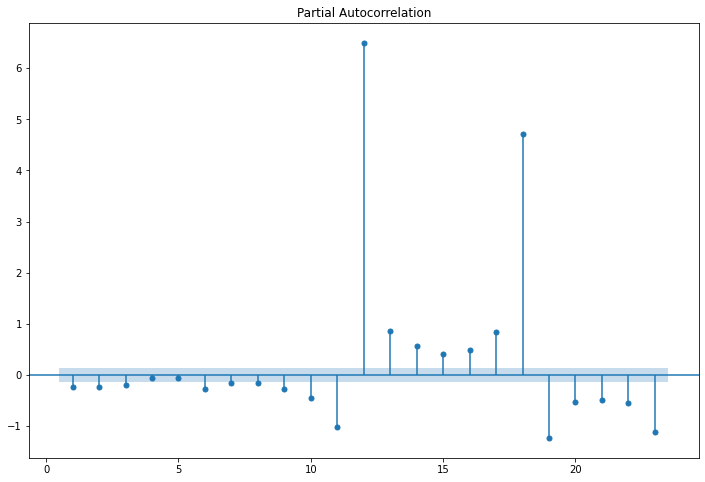

In [110]:
plot_pacf(x= Sparkling, zero = False , alpha=0.05)
plot_pacf(x= Sparkling.diff().dropna() , zero = False , alpha=0.05);

In [111]:
#For Rose Wine
dftest_Rose = adfuller(x = Rose , regression="ct")
print('DF test statistic for Rose is %3.3f' %dftest_Rose[0])
print('DF test p-value for Rose is' ,dftest_Rose[1])
print('Number of lags used for Rose' ,dftest_Rose[2])

DF test statistic for Rose is -2.241
DF test p-value for Rose is 0.4669420602610157
Number of lags used for Rose 13


In [112]:
#As we can see the p value is greater than 0.05 we fail to reject Null Hypothesis so we have to diff() the values and check again
#for the p value
dftest_Rose = adfuller(x = Rose.diff().dropna() , regression="ct")
print('DF test statistic for Rose is %3.3f' %dftest_Rose[0])
print('DF test p-value for Rose is' ,dftest_Rose[1])
print('Number of lags used for Rose' ,dftest_Rose[2])

DF test statistic for Rose is -8.161
DF test p-value for Rose is 3.028272263688236e-11
Number of lags used for Rose 12


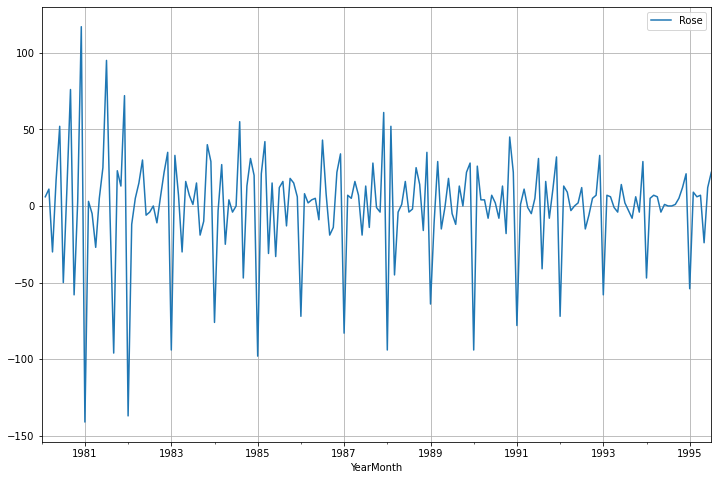

In [113]:
#Now as we can observe that p value is less than 0.05 so we reject null hypothesis
Rose.diff().plot(grid = True);

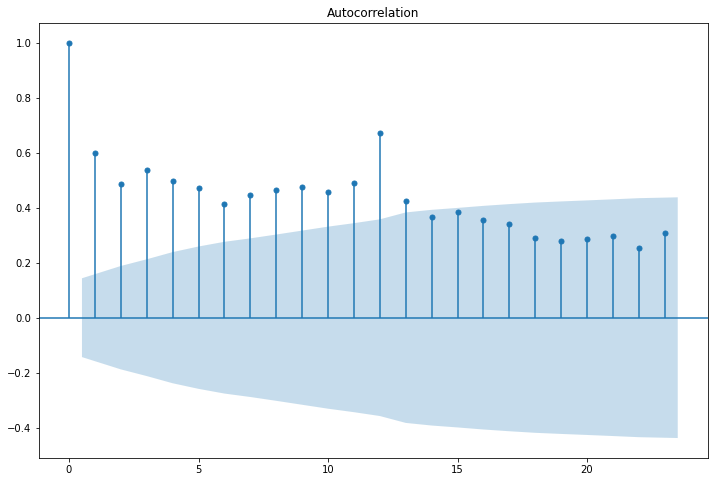

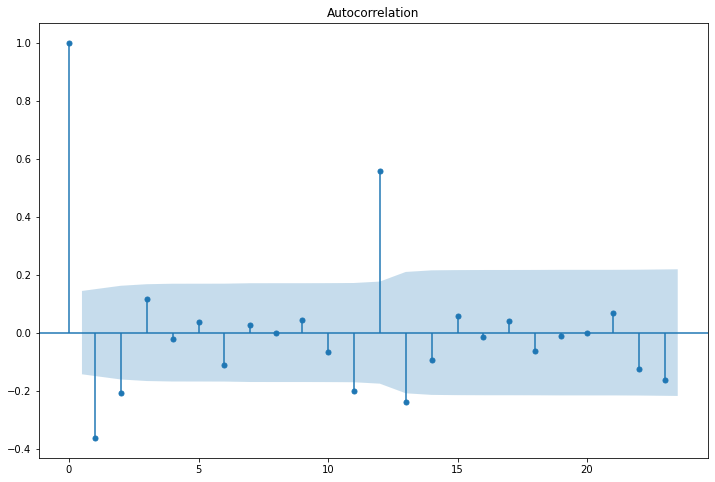

In [114]:
plot_acf(Rose,alpha = 0.05)
plot_acf(Rose.diff().dropna(),alpha = 0.05);

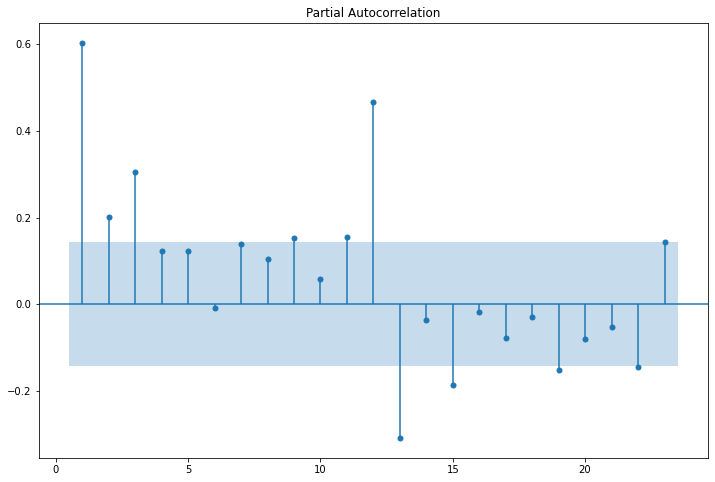

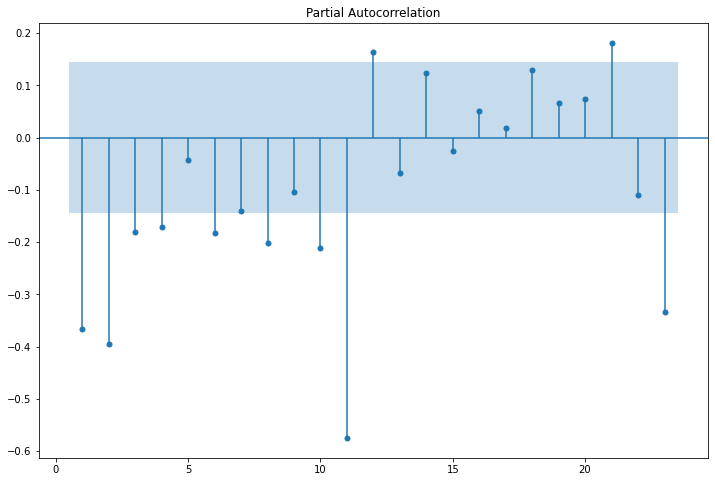

In [115]:
plot_pacf(Rose , zero = False , alpha = 0.05);
plot_pacf(x= Rose.diff().dropna() , zero = False , alpha=0.05);

In [116]:
#ARIMA Model Building for the best combinations
import itertools

In [117]:
p = q = range(0 , 4)
d = range(1,2)
pdq = list(itertools.product(p,d,q))
print("Some model parameters are: ")
for i in range(1,len(pdq)):
    print("Model: {}" .format(pdq[i]))

Some model parameters are: 
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [118]:
from statsmodels.tsa.arima_model import ARIMA

In [119]:
ARIMA_AIC = pd.DataFrame(columns=["param" , "AIC"])
ARIMA_AIC

,param,AIC


In [120]:
for param in pdq:
    ARIMA_model = ARIMA(train_Sparkling["Sparkling"].values,order=param).fit()
    print("ARIMA {} - AIC{}".format(param , ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({"param" : param , "AIC" : ARIMA_model.aic},ignore_index=True)

ARIMA (0, 1, 0) - AIC2269.582796371201


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA (0, 1, 1) - AIC2264.9064368172944
ARIMA (0, 1, 2) - AIC2232.783097684661
ARIMA (0, 1, 3) - AIC2233.016605138244
ARIMA (1, 1, 0) - AIC2268.5280606648653


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA (1, 1, 1) - AIC2235.0139453510988


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA (1, 1, 2) - AIC2233.597647119537


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA (1, 1, 3) - AIC2234.5741415471507
ARIMA (2, 1, 0) - AIC2262.035600095461


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA (2, 1, 1) - AIC2232.3604898848293


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                   

ARIMA (2, 1, 2) - AIC2210.616429928409


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                   

ARIMA (2, 1, 3) - AIC2227.558862178724
ARIMA (3, 1, 0) - AIC2259.471554860905


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA (3, 1, 1) - AIC2233.9217576682854


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                   

ARIMA (3, 1, 2) - AIC2228.9279853705893
ARIMA (3, 1, 3) - AIC2225.661558524996


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [121]:
ARIMA_AIC.sort_values(by = "AIC",ascending=True)

,param,AIC
10,"(2, 1, 2)",2210.616430
15,"(3, 1, 3)",2225.661559
11,"(2, 1, 3)",2227.558862
14,"(3, 1, 2)",2228.927985
9,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
3,"(0, 1, 3)",2233.016605
6,"(1, 1, 2)",2233.597647
13,"(3, 1, 1)",2233.921758
7,"(1, 1, 3)",2234.574142


In [122]:
auto_ARIMA_Sparkling = ARIMA(train_Sparkling["Sparkling"] ,order =(2,1,1))
results_ARIMA_Sparkling = auto_ARIMA_Sparkling.fit()
print(results_ARIMA_Sparkling.summary())
#train_Sparkling["Sparkling"].values

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1111.180
Method:                       css-mle   S.D. of innovations           1148.860
Date:                Wed, 19 May 2021   AIC                           2232.360
Time:                        19:13:46   BIC                           2246.736
Sample:                    02-01-1980   HQIC                          2238.202
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.2032      3.807      1.629      0.103      -1.259      13.665
ar.L1.D.Sparkling     0.5026      0.087      5.753      0.000       0.331       0.674
ar.L2.D.Sparkling    -0.

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [123]:
predictedARIMAForSparkling = results_ARIMA_Sparkling.forecast(len(test_Sparkling))
predictedARIMAForSparkling

(array([4145.91560515, 2858.42001072, 2578.74879882, 2688.37805215,
        2801.16134647, 2841.17347161, 2844.01104254, 2842.06531151,
        2844.81599651, 2850.84053805, 2857.61338629, 2864.13700053,
        2870.39243249, 2876.56068946, 2882.73635818, 2888.93240219,
        2895.13727042, 2901.34268172, 2907.54668051, 2913.74986571,
        2919.95291182, 2926.15604341, 2932.35924454, 2938.56246428,
        2944.76568009, 2950.96889038, 2957.17209864, 2963.37530694,
        2969.57851564, 2975.78172454, 2981.98493346, 2988.18814235,
        2994.39135123, 3000.5945601 , 3006.79776898, 3013.00097785,
        3019.20418673, 3025.4073956 , 3031.61060448, 3037.81381336,
        3044.01702223, 3050.22023111, 3056.42343998, 3062.62664886,
        3068.82985773, 3075.03306661, 3081.23627548, 3087.43948436,
        3093.64269324, 3099.84590211, 3106.04911099, 3112.25231986,
        3118.45552874, 3124.65873761, 3130.86194649]),
 array([1148.85970068, 1285.78475035, 1287.72913651, 1289.895

In [124]:
rmseForARIMA_Sparkling = metrics.mean_squared_error(test_Sparkling["Sparkling"] , predictedARIMAForSparkling[0] , squared=False)
rmseForARIMA_Sparkling

1418.206754256956

In [125]:
#ARIMA for the Rose Wine
for param in pdq:
    ARIMA_model = ARIMA(train_Rose["Rose"].values,order=param).fit()
    print("ARIMA {} - AIC{}".format(param , ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({"param" : param , "AIC" : ARIMA_model.aic},ignore_index=True)

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA (0, 1, 0) - AIC1335.1526583086775
ARIMA (0, 1, 1) - AIC1280.7261830464035
ARIMA (0, 1, 2) - AIC1276.8353726229147
ARIMA (0, 1, 3) - AIC1278.074254285777
ARIMA (1, 1, 0) - AIC1319.348310580781


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA (1, 1, 1) - AIC1277.7757468404075


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA (1, 1, 2) - AIC1277.359225603172


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA (1, 1, 3) - AIC1279.3126335366885
ARIMA (2, 1, 0) - AIC1300.6092611745498


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA (2, 1, 1) - AIC1279.0456894093106


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA (2, 1, 2) - AIC1279.2986939364973


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA (2, 1, 3) - AIC1281.1962260422672
ARIMA (3, 1, 0) - AIC1299.4787391543023


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA (3, 1, 1) - AIC1279.6059690497666


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA (3, 1, 2) - AIC1280.9692496508637
ARIMA (3, 1, 3) - AIC1273.1940957775246


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they a

In [126]:
ARIMA_AIC.sort_values(by = "AIC",ascending=True)

,param,AIC
31,"(3, 1, 3)",1273.194096
18,"(0, 1, 2)",1276.835373
22,"(1, 1, 2)",1277.359226
21,"(1, 1, 1)",1277.775747
19,"(0, 1, 3)",1278.074254
25,"(2, 1, 1)",1279.045689
26,"(2, 1, 2)",1279.298694
23,"(1, 1, 3)",1279.312634
29,"(3, 1, 1)",1279.605969
17,"(0, 1, 1)",1280.726183


In [127]:
auto_ARIMA_Rose = ARIMA(train_Rose["Rose"] ,order =(3,1,3))
results_ARIMA_Rose = auto_ARIMA_Rose.fit()
print(results_ARIMA_Rose.summary())

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.356
Date:                Wed, 19 May 2021   AIC                           1273.194
Time:                        19:13:53   BIC                           1296.196
Sample:                    02-01-1980   HQIC                          1282.541
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.547      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7243      0.086     -8.403      0.000      -0.893      -0.555
ar.L2.D.Rose    -0.7217      0.087     -8.33

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they a

In [128]:
predictedARIMAForRose = results_ARIMA_Rose.forecast(len(test_Rose))
predictedARIMAForRose

(array([74.74556312, 75.53858993, 81.70615845, 59.77844316, 70.36371057,
        79.16313125, 58.02535499, 68.84534826, 77.63202187, 56.55239039,
        67.40434354, 76.12238109, 55.0854649 , 65.96485013, 74.61322051,
        53.61876993, 64.52526087, 73.1040957 , 52.15218195, 63.08554182,
        71.59499756, 50.68569788, 61.64569238, 70.08592623, 49.21931723,
        60.20571266, 68.57688204, 47.75303953, 58.76560277, 67.06786532,
        46.28686433, 57.32536284, 65.55887639, 44.82079119, 55.884993  ,
        64.04991559, 43.35481964, 54.44449336, 62.54098324, 41.88894924,
        53.00386406, 61.03207967, 40.42317954, 51.56310523, 59.52320519,
        38.95751009, 50.12221698, 58.01436014, 37.49194043, 48.68119944,
        56.50554482, 36.02647012, 47.24005276, 54.99675956, 34.56109872]),
 array([28.35568133, 29.30242533, 29.41223484, 29.4197606 , 29.42102328,
        29.42400606, 29.4241073 , 29.42730211, 29.42968041, 29.42974849,
        29.43297381, 29.43534099, 29.43540544, 29

In [129]:
rmseForARIMA_Rose = metrics.mean_squared_error(test_Rose["Rose"] , predictedARIMAForRose[0] , squared=False)
rmseForARIMA_Rose

15.990025799097026

In [130]:
ResultsForARIMA = pd.DataFrame({"Test RMSE For Sparkling" : [rmseForARIMA_Sparkling] , "Test RMSE For Rose" : [rmseForARIMA_Rose]},index=["ARIMA for Sparkling(2,1,2) and ARMIA for Rose(3,1,3) Result"])
resultsDf = pd.concat([resultsDf ,ResultsForARIMA])
resultsDf

,Test RMSE For Sparkling,Test RMSE For Rose
Linear Regression Result,1389.135175,15.275732
Naive Bayes Result,3864.279352,79.738550
Simple Average Result,1275.073380,15.769664
Simple Exponential Result,1338.012144,36.816890
Double Exponential Result,3949.993290,15.276106
Exponential Smoothning Result,379.695686,14.280860
"ARIMA for Sparkling(2,1,2) and ARMIA for Rose(3,1,3) Result",1418.206754,15.990026


In [131]:
#SARIMA for the Sparkling Wine
#Taking Seasonality as 6
p = q = range(0 , 4)
d = range(1,2)
D = range(0,1)
pdq = list(itertools.product(p,d,q))
model_pdq = [(x[0],x[1],x[2],6) for x in list(list(itertools.product(p,D,q)))]
print("Some model parameters are: ")
for i in range(1,len(pdq)):
    print("Model: {}{}" .format(pdq[i], model_pdq[i]))

Some model parameters are: 
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [132]:
SARIMA_AIC = pd.DataFrame(columns=["param","seasonal","AIC"])
SARIMA_AIC

,param,seasonal,AIC


In [133]:
import statsmodels.api as sm

In [134]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_Model = sm.tsa.statespace.SARIMAX(train_Sparkling["Sparkling"].values,order = param,
                                                seasonal_order=param_seasonal,enforce_invertibility=False,
                                                enforce_stationarity=False)
        results_SARIMA = SARIMA_Model.fit()
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({"param":param ,"seasonal" : param_seasonal ,"AIC":results_SARIMA.aic},ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.378076171629
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.635553689071
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1863.784515497332
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984443091
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111440978
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1803.392909486036
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510511
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657544
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1725.5376425549457
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1748.7622668155268
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1750.6879953816454
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1739.4489858031943


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1725.0145005770814
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908282
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339544276
SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:1826.5285284608099
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.573242878454
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298136749
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274536223


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 6) - AIC:1740.0227970601443
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885104034895
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933620354
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6964513483692


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 6) - AIC:1676.9361042018586
SARIMA(0, 1, 1)x(3, 0, 0, 6) - AIC:1708.115397938217


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 1, 6) - AIC:1709.0030985418275


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 2, 6) - AIC:1689.0707516709076


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 6) - AIC:1678.3002171592475
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2187.441010168703
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2087.68438402156
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1886.1151456835987
SARIMA(0, 1, 2)x(0, 0, 3, 6) - AIC:1794.4778967487994
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2129.7395689234118


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1988.4216839876567


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1846.355647708359


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 6) - AIC:1759.967763450581
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1791.6537079050017
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1793.6190997284577


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:1727.888877971984


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 6) - AIC:1747.025267437959
SARIMA(0, 1, 2)x(3, 0, 0, 6) - AIC:1701.671864834567


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 1, 6) - AIC:1704.7507930818783


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 2, 6) - AIC:1688.8506559807524


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 6) - AIC:1653.319831077998
SARIMA(0, 1, 3)x(0, 0, 0, 6) - AIC:2168.092540843793
SARIMA(0, 1, 3)x(0, 0, 1, 6) - AIC:2067.6505836656434
SARIMA(0, 1, 3)x(0, 0, 2, 6) - AIC:1872.7158412224921
SARIMA(0, 1, 3)x(0, 0, 3, 6) - AIC:1780.6423351918802
SARIMA(0, 1, 3)x(1, 0, 0, 6) - AIC:2128.229114761972


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 1, 6) - AIC:1960.7317689916933


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 2, 6) - AIC:1827.1202999118807


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 6) - AIC:1706.9585840572192
SARIMA(0, 1, 3)x(2, 0, 0, 6) - AIC:1793.6426994691612


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 1, 6) - AIC:1796.7096414776317


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 2, 6) - AIC:1715.3471373678724


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 6) - AIC:1633.6390585767986
SARIMA(0, 1, 3)x(3, 0, 0, 6) - AIC:1702.7016907995712


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 1, 6) - AIC:1705.0424504525065


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 2, 6) - AIC:1698.6773828586513


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 6) - AIC:1671.6891996292402
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:2151.0782683084094
SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1953.36522454765
SARIMA(1, 1, 0)x(0, 0, 3, 6) - AIC:1862.2711147361265
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:2146.1836648562185
SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:2073.9813685253635
SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1917.5889468359528
SARIMA(1, 1, 0)x(1, 0, 3, 6) - AIC:1797.1695150022126
SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:1813.2423977989204
SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1814.830160283075


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1791.3715263024058
SARIMA(1, 1, 0)x(2, 0, 3, 6) - AIC:1705.4579657159284
SARIMA(1, 1, 0)x(3, 0, 0, 6) - AIC:1725.4603199331114
SARIMA(1, 1, 0)x(3, 0, 1, 6) - AIC:1725.6193739206371


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 2, 6) - AIC:1727.040864962306


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 6) - AIC:1719.7046094272434
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:2204.9340491545727
SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:2103.2471520738713
SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1906.3976381404998
SARIMA(1, 1, 1)x(0, 0, 3, 6) - AIC:1814.6532925056665
SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:2109.667120973266
SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:2005.612566133248


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1876.543660898545


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 6) - AIC:1740.048526002316
SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:1776.9417670618593
SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1778.8222558049356


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1764.949115031785


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 6) - AIC:1665.1857592611634
SARIMA(1, 1, 1)x(3, 0, 0, 6) - AIC:1689.9510871589987


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 1, 6) - AIC:1686.6829274676677


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 2, 6) - AIC:1787.5709996965957


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 6) - AIC:1776.8927753719172
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:2188.463345050487
SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:2089.1320924458305
SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1908.3347898050017


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 6) - AIC:1796.4739305072655
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:2108.5645510274094


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1989.8796809435362


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1892.8614344839996


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 6) - AIC:1743.3192514142472
SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:1773.4229389484356


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1775.2598874991545


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1879.9950252470153


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 6) - AIC:1722.0777797388596


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 0, 6) - AIC:1688.1424539583238


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 1, 6) - AIC:1731.1058478693733


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 2, 6) - AIC:1748.1332678424337


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 6) - AIC:1675.7183291146466
SARIMA(1, 1, 3)x(0, 0, 0, 6) - AIC:2171.026403977742
SARIMA(1, 1, 3)x(0, 0, 1, 6) - AIC:2057.3183178828435


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 2, 6) - AIC:1912.2446608964349


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 6) - AIC:1782.5271122129727
SARIMA(1, 1, 3)x(1, 0, 0, 6) - AIC:2093.20307739825


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 1, 6) - AIC:2012.9779578737762


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 2, 6) - AIC:1901.5330787685334


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 6) - AIC:1801.2018891999685


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 0, 6) - AIC:1773.9326071584408


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 1, 6) - AIC:1779.8631904582526


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 2, 6) - AIC:1717.1600839489413


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 6) - AIC:1749.2875520839905


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 0, 6) - AIC:1690.05843541998


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 1, 6) - AIC:1810.0496032561152


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 2, 6) - AIC:1834.688409256785


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 6) - AIC:1685.6164521306662
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:2145.357699120111
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1945.1561426086507
SARIMA(2, 1, 0)x(0, 0, 3, 6) - AIC:1851.6846244369024
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:2124.9071786318195
SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:2054.170071226205
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1915.633692249949
SARIMA(2, 1, 0)x(1, 0, 3, 6) - AIC:1791.3157587261203
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:1782.735782105787
SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1782.3598160211322
SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1760.342673571571


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 6) - AIC:1689.6051428417936
SARIMA(2, 1, 0)x(3, 0, 0, 6) - AIC:1693.9360351822233


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 1, 6) - AIC:1698.122363502035


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 2, 6) - AIC:1677.4862658805034


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 6) - AIC:1696.0507545518183
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:2199.8586131454495
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:2103.085905822333
SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:1903.0416542521125
SARIMA(2, 1, 1)x(0, 0, 3, 6) - AIC:1810.6330100122382
SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:2088.133636367894


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:1997.3693001427062


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1866.6534974191616


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 6) - AIC:1733.0099872819887
SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1794.8112219321938


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1765.3255390095992


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1744.7202664678007


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:1683.125246147294
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:1676.1994485026514


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:1708.6852133515774


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:1731.9265841368688


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:1707.3991478124942
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:2176.8681144920774


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:2069.3696482281416
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1889.787540459286
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1797.0726419076705


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:2074.1160461007


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1963.320403603028


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1922.4300595017446


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:1824.5787837022096


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1765.7488898256977


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1831.3100252526942


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1772.3960280164074


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:1747.7093647928016


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:1679.2818415594443


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:1804.7396376233787


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:1739.767332726009


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:1802.8105213397882
SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:2171.0395889190677
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:2063.5241671498043


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 2, 6) - AIC:1871.217712406909


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 6) - AIC:1783.6936038041308


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 0, 6) - AIC:2063.07547273071


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 1, 6) - AIC:1996.2998490714322


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 2, 6) - AIC:1893.8195588438648


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 6) - AIC:1795.9866925168033


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 0, 6) - AIC:1767.9470563412583


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 1, 6) - AIC:1883.5408254471672


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 2, 6) - AIC:1766.740004162635


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 6) - AIC:1781.3411754271044


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 0, 6) - AIC:1679.2906161109852


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 1, 6) - AIC:1822.1149809568112


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 2, 6) - AIC:1823.7873512880687


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 6) - AIC:1793.4753456081946
SARIMA(3, 1, 0)x(0, 0, 0, 6) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 6) - AIC:2141.86445184553
SARIMA(3, 1, 0)x(0, 0, 2, 6) - AIC:1943.953429566514
SARIMA(3, 1, 0)x(0, 0, 3, 6) - AIC:1850.949483038985
SARIMA(3, 1, 0)x(1, 0, 0, 6) - AIC:2102.6673948406024
SARIMA(3, 1, 0)x(1, 0, 1, 6) - AIC:2026.7285624707304
SARIMA(3, 1, 0)x(1, 0, 2, 6) - AIC:1908.6423194670103
SARIMA(3, 1, 0)x(1, 0, 3, 6) - AIC:1783.0592427489987
SARIMA(3, 1, 0)x(2, 0, 0, 6) - AIC:1764.6816446585563
SARIMA(3, 1, 0)x(2, 0, 1, 6) - AIC:1765.3335735436203


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 2, 6) - AIC:1744.08132594652


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 3, 6) - AIC:1690.200420092665
SARIMA(3, 1, 0)x(3, 0, 0, 6) - AIC:1679.2813201398312


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 1, 6) - AIC:1678.3079664751563


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 2, 6) - AIC:1771.833211739314


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 6) - AIC:1734.2454523878914
SARIMA(3, 1, 1)x(0, 0, 0, 6) - AIC:2188.222098341979
SARIMA(3, 1, 1)x(0, 0, 1, 6) - AIC:2100.9316371386058
SARIMA(3, 1, 1)x(0, 0, 2, 6) - AIC:1904.956131266148
SARIMA(3, 1, 1)x(0, 0, 3, 6) - AIC:1812.534895581694
SARIMA(3, 1, 1)x(1, 0, 0, 6) - AIC:2063.575914679292


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 1, 6) - AIC:1964.558720622432


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 2, 6) - AIC:1842.4810692518538


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 6) - AIC:1729.0389447134212
SARIMA(3, 1, 1)x(2, 0, 0, 6) - AIC:1747.83821635662


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 1, 6) - AIC:1749.8290244221525


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 2, 6) - AIC:1772.9193640341562


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 6) - AIC:1663.7792279155617
SARIMA(3, 1, 1)x(3, 0, 0, 6) - AIC:1663.2792331056057


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 1, 6) - AIC:1692.199530133644


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 2, 6) - AIC:1665.5836922150893


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 6) - AIC:1784.66319486386
SARIMA(3, 1, 2)x(0, 0, 0, 6) - AIC:2187.3147271465705
SARIMA(3, 1, 2)x(0, 0, 1, 6) - AIC:2082.1148719841453


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 2, 6) - AIC:1893.5296469812934


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 6) - AIC:1827.138809940454
SARIMA(3, 1, 2)x(1, 0, 0, 6) - AIC:2066.1453166242013


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 1, 6) - AIC:2035.4640706927942


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 2, 6) - AIC:1922.7741245689592


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 6) - AIC:1822.586863327823


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 0, 6) - AIC:1751.151680972253


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 1, 6) - AIC:1842.1976886733382


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 2, 6) - AIC:1870.7940389795094


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 6) - AIC:1802.6033364302334


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 0, 6) - AIC:1663.4475783229143


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 1, 6) - AIC:1779.614961552103


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 2, 6) - AIC:1812.9433357009518


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 6) - AIC:1818.4897278792268
SARIMA(3, 1, 3)x(0, 0, 0, 6) - AIC:2155.7749542046586
SARIMA(3, 1, 3)x(0, 0, 1, 6) - AIC:2053.1966244014975
SARIMA(3, 1, 3)x(0, 0, 2, 6) - AIC:1912.6738883065211


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 6) - AIC:1817.1797667296694
SARIMA(3, 1, 3)x(1, 0, 0, 6) - AIC:2068.7187604748406


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 1, 6) - AIC:1990.484281035479


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 2, 6) - AIC:1894.34917272814


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 6) - AIC:1795.9315586809769


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 0, 6) - AIC:1855.8936939009566


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 1, 6) - AIC:1886.8386224865399


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 2, 6) - AIC:1880.9972626068752


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 6) - AIC:1780.534291598247


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 0, 6) - AIC:1778.7787773527746


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 1, 6) - AIC:1803.2726096794229


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 2, 6) - AIC:1802.830762896584
SARIMA(3, 1, 3)x(3, 0, 3, 6) - AIC:1784.729668140045


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [135]:
SARIMA_AIC.sort_values(by = ["AIC"]).head()

,param,seasonal,AIC
59,"(0, 1, 3)","(2, 0, 3, 6)",1633.639059
47,"(0, 1, 2)","(3, 0, 3, 6)",1653.319831
220,"(3, 1, 1)","(3, 0, 0, 6)",1663.279233
236,"(3, 1, 2)","(3, 0, 0, 6)",1663.447578
219,"(3, 1, 1)","(2, 0, 3, 6)",1663.779228


In [136]:
import statsmodels.api as sm 

In [137]:
auto_SARIMA_Sparkling = sm.tsa.statespace.SARIMAX(train_Sparkling["Sparkling"] , order=(0,1,3),seasonal_order=(2,0,3,6),enforce_invertibility=False , enforce_stationarity= False)
results_auto_SARIMA_Sparkling = auto_SARIMA_Sparkling.fit()
print(results_auto_SARIMA_Sparkling.summary())

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -807.820
Date:                           Wed, 19 May 2021   AIC                           1633.639
Time:                                   19:17:32   BIC                           1657.861
Sample:                               01-01-1980   HQIC                          1643.462
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.4295      1.010     -1.415      0.157      -3.409       0.550
ma.L2         -0.1998      0.345     -0.579

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [138]:
predicted_auto_SARIMA_Sparkling = results_auto_SARIMA_Sparkling.get_forecast(len(test_Sparkling))
predicted_auto_SARIMA_Sparkling.summary_frame(alpha = 0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,1334.908746,393.887574,562.903286,2106.914206
1991-02-01,1070.842050,402.559635,281.839662,1859.844437
1991-03-01,1552.197352,402.695133,762.929394,2341.465309
1991-04-01,1421.785438,408.750746,620.648697,2222.922178
1991-05-01,1167.866787,414.737768,354.995700,1980.737874


In [139]:
rmseForSARIMA_Sparkling = metrics.mean_squared_error(test_Sparkling["Sparkling"] , predicted_auto_SARIMA_Sparkling.predicted_mean,squared=False)
rmseForSARIMA_Sparkling

890.9592380136369

In [140]:
#SARIMA for Rose Wine
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_Model = sm.tsa.statespace.SARIMAX(train_Rose["Rose"].values,order = param,
                                                seasonal_order=param_seasonal,enforce_invertibility=False,
                                                enforce_stationarity=False)
        results_SARIMA = SARIMA_Model.fit()
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({"param":param ,"seasonal" : param_seasonal ,"AIC":results_SARIMA.aic},ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113863
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827322
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.271383062524
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149089
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266721867
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.986174312437
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515088
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.022442617828
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.804820641965
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.5465834695271
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.3687765139873
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.042505301648
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1058.8917095262093
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029548
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AI

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 2, 6) - AIC:1002.4818501483479
SARIMA(0, 1, 2)x(3, 0, 3, 6) - AIC:963.073732437108
SARIMA(0, 1, 3)x(0, 0, 0, 6) - AIC:1243.950121673909
SARIMA(0, 1, 3)x(0, 0, 1, 6) - AIC:1183.3699555830976
SARIMA(0, 1, 3)x(0, 0, 2, 6) - AIC:1075.3558340399438
SARIMA(0, 1, 3)x(0, 0, 3, 6) - AIC:998.0561578612208
SARIMA(0, 1, 3)x(1, 0, 0, 6) - AIC:1221.1933435511337
SARIMA(0, 1, 3)x(1, 0, 1, 6) - AIC:1140.8885775729716
SARIMA(0, 1, 3)x(1, 0, 2, 6) - AIC:1055.5401877884585
SARIMA(0, 1, 3)x(1, 0, 3, 6) - AIC:992.1840428805283
SARIMA(0, 1, 3)x(2, 0, 0, 6) - AIC:1089.6207835479672
SARIMA(0, 1, 3)x(2, 0, 1, 6) - AIC:1091.3098777227951
SARIMA(0, 1, 3)x(2, 0, 2, 6) - AIC:1033.513063170009
SARIMA(0, 1, 3)x(2, 0, 3, 6) - AIC:952.0736322228282
SARIMA(0, 1, 3)x(3, 0, 0, 6) - AIC:1022.036050020731
SARIMA(0, 1, 3)x(3, 0, 1, 6) - AIC:1008.5076655550687


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 2, 6) - AIC:1001.8917983780939
SARIMA(0, 1, 3)x(3, 0, 3, 6) - AIC:954.0491617353995
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:1249.8763225267473
SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1135.5498105815734
SARIMA(1, 1, 0)x(0, 0, 3, 6) - AIC:1069.5311362020739
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:1250.6246888229598
SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:1230.6009595918001
SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1133.8029696523463
SARIMA(1, 1, 0)x(1, 0, 3, 6) - AIC:1047.7441478991095
SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:1123.2830148979986
SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1120.942539241692
SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1105.9092655257855
SARIMA(1, 1, 0)x(2, 0, 3, 6) - AIC:1044.7054444344349
SARIMA(1, 1, 0)x(3, 0, 0, 6) - AIC:1056.3609106599702
SARIMA(1, 1, 0)x(3, 0, 1, 6) - AIC:1047.2634985024788
SARIMA(1, 1, 0)x(3, 0, 2, 6) - AIC:1048.238852770899
SARIMA(1, 1, 0)x(3, 0, 3, 6) - AIC:1044.9201178151247
SARIMA(1, 1, 1)x(0, 0, 0, 6) - A

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 6) - AIC:966.4109570914659
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:1251.9495040706115
SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:1193.280405758632
SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1083.8066266630822
SARIMA(1, 1, 2)x(0, 0, 3, 6) - AIC:1010.2260980587016
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:1213.218395375348
SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1155.482911194488
SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1061.3428437952145


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 6) - AIC:996.7664902847921
SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:1081.9393759713644


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1093.1472121698614


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1041.696027283524


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 6) - AIC:962.1627450097575
SARIMA(1, 1, 2)x(3, 0, 0, 6) - AIC:1030.096665684976
SARIMA(1, 1, 2)x(3, 0, 1, 6) - AIC:1020.9030816757123
SARIMA(1, 1, 2)x(3, 0, 2, 6) - AIC:1006.4311858976631


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 6) - AIC:965.2754616596644
SARIMA(1, 1, 3)x(0, 0, 0, 6) - AIC:1245.5463125316312
SARIMA(1, 1, 3)x(0, 0, 1, 6) - AIC:1177.8357166664107


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 2, 6) - AIC:1071.9135567826136
SARIMA(1, 1, 3)x(0, 0, 3, 6) - AIC:996.2173642899114


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 0, 6) - AIC:1207.8902060913103


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 1, 6) - AIC:1141.4931960884717


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 2, 6) - AIC:1048.6308340889334


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 6) - AIC:990.1372155842118
SARIMA(1, 1, 3)x(2, 0, 0, 6) - AIC:1081.011657960985


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 1, 6) - AIC:1083.9855660634976


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 2, 6) - AIC:1041.624463211741
SARIMA(1, 1, 3)x(2, 0, 3, 6) - AIC:953.6849506728962
SARIMA(1, 1, 3)x(3, 0, 0, 6) - AIC:1028.1858815589515
SARIMA(1, 1, 3)x(3, 0, 1, 6) - AIC:1019.732448988547
SARIMA(1, 1, 3)x(3, 0, 2, 6) - AIC:1007.7128265736118


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 6) - AIC:955.6600530926617
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:1231.9630734540337
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1128.9876565220643
SARIMA(2, 1, 0)x(0, 0, 3, 6) - AIC:1058.6689517710365
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:1219.0664587882736
SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:1186.6130717491194
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1111.6702480689974
SARIMA(2, 1, 0)x(1, 0, 3, 6) - AIC:1044.3478369959726
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:1099.0398509026265
SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1093.0537127081222
SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1078.611474176616
SARIMA(2, 1, 0)x(2, 0, 3, 6) - AIC:1026.2970646213898
SARIMA(2, 1, 0)x(3, 0, 0, 6) - AIC:1003.6760779292606
SARIMA(2, 1, 0)x(3, 0, 1, 6) - AIC:1004.5290918309635
SARIMA(2, 1, 0)x(3, 0, 2, 6) - AIC:994.9874170319181
SARIMA(2, 1, 0)x(3, 0, 3, 6) - AIC:997.0369947125965
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:1263.2315231799707
SARIMA(2, 1, 1)x(0, 0, 1, 6) - A

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1160.63297133294


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.1103215273422


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:996.8726643149437
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.6961457923378
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1070.0771798927149


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1045.293401663105


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:961.1190590634668
SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:975.6133308537025
SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:977.0520554685712


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:962.9974926416177


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:971.720192894585
SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:1237.8701696494174
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:1174.1516821146654
SARIMA(2, 1, 3)x(0, 0, 2, 6) - AIC:1077.0677580068707


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 6) - AIC:995.8081551904042
SARIMA(2, 1, 3)x(1, 0, 0, 6) - AIC:1185.2892267240784


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 1, 6) - AIC:1125.989169002593
SARIMA(2, 1, 3)x(1, 0, 2, 6) - AIC:1055.0790852643142


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 6) - AIC:991.6948687179959
SARIMA(2, 1, 3)x(2, 0, 0, 6) - AIC:1074.3352770239378
SARIMA(2, 1, 3)x(2, 0, 1, 6) - AIC:1065.3992436211709


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 2, 6) - AIC:1026.779406363847


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 6) - AIC:952.4354011475167
SARIMA(2, 1, 3)x(3, 0, 0, 6) - AIC:976.9942667348748


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 1, 6) - AIC:978.3134939884786


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 2, 6) - AIC:961.6341409174565


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 6) - AIC:953.2710578363245
SARIMA(3, 1, 0)x(0, 0, 0, 6) - AIC:1269.8130062641508
SARIMA(3, 1, 0)x(0, 0, 1, 6) - AIC:1231.0483564306764
SARIMA(3, 1, 0)x(0, 0, 2, 6) - AIC:1118.5942596318898
SARIMA(3, 1, 0)x(0, 0, 3, 6) - AIC:1044.5526530822372
SARIMA(3, 1, 0)x(1, 0, 0, 6) - AIC:1208.6291501251628
SARIMA(3, 1, 0)x(1, 0, 1, 6) - AIC:1176.6540329798952
SARIMA(3, 1, 0)x(1, 0, 2, 6) - AIC:1109.780939988337
SARIMA(3, 1, 0)x(1, 0, 3, 6) - AIC:1034.9201475006214
SARIMA(3, 1, 0)x(2, 0, 0, 6) - AIC:1079.2853822015024
SARIMA(3, 1, 0)x(2, 0, 1, 6) - AIC:1072.8138748479198
SARIMA(3, 1, 0)x(2, 0, 2, 6) - AIC:1066.9903339610537
SARIMA(3, 1, 0)x(2, 0, 3, 6) - AIC:1020.7504026303882
SARIMA(3, 1, 0)x(3, 0, 0, 6) - AIC:984.7336162283945
SARIMA(3, 1, 0)x(3, 0, 1, 6) - AIC:986.6501812857557
SARIMA(3, 1, 0)x(3, 0, 2, 6) - AIC:985.1049146778341
SARIMA(3, 1, 0)x(3, 0, 3, 6) - AIC:983.316129921876
SARIMA(3, 1, 1)x(0, 0, 0, 6) - AIC:1255.0658180709434
SARIMA(3, 1, 1)x(0, 0, 1, 6) - AIC:

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 1, 6) - AIC:1149.0933498024303


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 2, 6) - AIC:1063.1099821531282


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 6) - AIC:994.0424446644258


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 0, 6) - AIC:1065.3272359054783


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 1, 6) - AIC:1061.3299322920655


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 2, 6) - AIC:1046.4209956810078


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 6) - AIC:963.841233195368


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 0, 6) - AIC:963.4445799972433


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 1, 6) - AIC:966.8345240978201


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 2, 6) - AIC:962.9549802767336


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 6) - AIC:964.5372817854383


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 0, 6) - AIC:1243.738658985848
SARIMA(3, 1, 3)x(0, 0, 1, 6) - AIC:1176.1392425858505


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 2, 6) - AIC:1057.3449011910648


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 6) - AIC:994.1703515372697
SARIMA(3, 1, 3)x(1, 0, 0, 6) - AIC:1179.14654418955


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 1, 6) - AIC:1126.662595994409


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 2, 6) - AIC:1058.1153097061967


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 6) - AIC:993.7198507459055


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 0, 6) - AIC:1048.1652756967178
SARIMA(3, 1, 3)x(2, 0, 1, 6) - AIC:1054.3672228341202


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 2, 6) - AIC:1038.2245674310352


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 6) - AIC:956.9792479396575


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 0, 6) - AIC:984.9145177439073


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 1, 6) - AIC:984.5065877966317


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 2, 6) - AIC:985.9399947898975
SARIMA(3, 1, 3)x(3, 0, 3, 6) - AIC:958.9466863908441


C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [141]:
SARIMA_AIC.sort_values(by = ["AIC"]).head()

,param,seasonal,AIC
315,"(0, 1, 3)","(2, 0, 3, 6)",952.073632
443,"(2, 1, 3)","(2, 0, 3, 6)",952.435401
447,"(2, 1, 3)","(3, 0, 3, 6)",953.271058
379,"(1, 1, 3)","(2, 0, 3, 6)",953.684951
319,"(0, 1, 3)","(3, 0, 3, 6)",954.049162


In [142]:
auto_SARIMA_Rose = sm.tsa.statespace.SARIMAX(train_Rose["Rose"] , order=(0,1,3),seasonal_order=(2,0,3,6),enforce_invertibility=False , enforce_stationarity= False)
results_auto_SARIMA_Rose = auto_SARIMA_Rose.fit()
print(results_auto_SARIMA_Rose.summary())

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -467.037
Date:                           Wed, 19 May 2021   AIC                            952.074
Time:                                   19:20:34   BIC                            976.296
Sample:                               01-01-1980   HQIC                           961.897
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7647    123.628     -0.006      0.995    -243.071     241.542
ma.L2         -0.2574     29.103     -0.009

In [143]:
predicted_auto_SARIMA_Rose = results_auto_SARIMA_Rose.get_forecast(len(test_Rose))
predicted_auto_SARIMA_Rose.summary_frame(alpha = 0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,64.771934,17.037676,31.378704,98.165165
1991-02-01,70.215935,17.537872,35.842338,104.589532
1991-03-01,78.982783,17.537367,44.610175,113.355390
1991-04-01,77.191968,17.534553,42.824876,111.559061
1991-05-01,77.911597,17.534553,43.544504,112.278690


In [144]:
rmseForSARIMA_Rose = metrics.mean_squared_error(test_Rose["Rose"] , predicted_auto_SARIMA_Rose.predicted_mean,squared=False)
rmseForSARIMA_Rose

30.592764018238874

In [145]:
ResultsForSARIMA = pd.DataFrame({"Test RMSE For Sparkling" : [rmseForSARIMA_Sparkling] , "Test RMSE For Rose" : [rmseForSARIMA_Rose]},index=["SARIMA for Sparkling(0,1,3)(2,0,3,6) and SARMIA for Rose(0,1,3)(2,0,3,6) Result"])
resultsDf = pd.concat([resultsDf ,ResultsForSARIMA])
resultsDf

,Test RMSE For Sparkling,Test RMSE For Rose
Linear Regression Result,1389.135175,15.275732
Naive Bayes Result,3864.279352,79.738550
Simple Average Result,1275.073380,15.769664
Simple Exponential Result,1338.012144,36.816890
Double Exponential Result,3949.993290,15.276106
Exponential Smoothning Result,379.695686,14.280860
"ARIMA for Sparkling(2,1,2) and ARMIA for Rose(3,1,3) Result",1418.206754,15.990026
"SARIMA for Sparkling(0,1,3)(2,0,3,6) and SARMIA for Rose(0,1,3)(2,0,3,6) Result",890.959238,30.592764


In [146]:
#To get the best prediction for the next 12 months we use the Exponential Smoothening Model as it has lowest rmse values for both
#sparkling and rose wine

In [147]:
#Reading the Data set for Sparkling Wine
Sparkling_ForFullData_Train = pd.read_csv("C:/Users/Vidhut Sharma/Documents/PRojectsGivenByGL/Sparkling.csv",parse_dates=["YearMonth"],index_col="YearMonth")

In [148]:
Sparkling_ForFullData_Train

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670


In [149]:
Df = {"YearMonth": ["1995-08-01" , "1995-09-01" , "1995-10-01","1995-11-01","1995-12-01","1996-01-01","1996-02-01",
                   "1996-03-01","1996-04-01","1996-05-01","1996-06-01","1996-07-01"]}
New_DataForNextOneYr = pd.DataFrame(Df)
Sparkling_ForFullData_Test =New_DataForNextOneYr
Rose_ForFullData_Test =New_DataForNextOneYr

In [150]:
EXS_Sparkling = ExponentialSmoothing(Sparkling_ForFullData_Train,trend="additive" , seasonal="additive" , initialization_method="estimated")

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [151]:
EXS_Sparkling = EXS_Sparkling.fit()

In [152]:
EXS_Sparkling_Predict = EXS_Sparkling.forecast(len(Sparkling_ForFullData_Test))
EXS_Sparkling_Predict

1995-08-01    1877.418973
1995-09-01    2405.272289
1995-10-01    3242.091582
1995-11-01    3922.174721
1995-12-01    6118.486885
1996-01-01    1262.602775
1996-02-01    1592.120997
1996-03-01    1831.635313
1996-04-01    1806.451718
1996-05-01    1651.704099
1996-06-01    1586.487882
1996-07-01    1976.989421
Freq: MS, dtype: float64

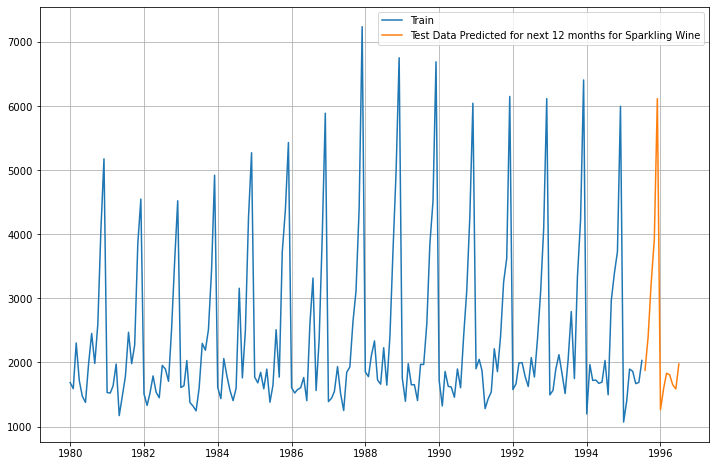

In [153]:
plt.plot(Sparkling_ForFullData_Train , label = "Train")
plt.plot(EXS_Sparkling_Predict , label = "Test Data Predicted for next 12 months for Sparkling Wine")
plt.legend(loc = "best")
plt.grid()

In [154]:
#Rose Wine
Rose_ForFullData_Train = pd.read_csv("C:/Users/Vidhut Sharma/Documents/PRojectsGivenByGL/Rose.csv",parse_dates=["YearMonth"],index_col="YearMonth")

In [155]:
Rose_ForFullData_Train

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0


In [156]:
Rose_ForFullData_Train.loc["1994-01-01" : "1994-12-01"]["Rose"] = np.where(Rose_ForFullData_Train.loc["1994-01-01" : "1994-12-01"]["Rose"].isnull() == True , 45,Rose_ForFullData_Train.loc["1994-01-01" : "1994-12-01"]["Rose"])

<ipython-input-156-f71823d7f71b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rose_ForFullData_Train.loc["1994-01-01" : "1994-12-01"]["Rose"] = np.where(Rose_ForFullData_Train.loc["1994-01-01" : "1994-12-01"]["Rose"].isnull() == True , 45,Rose_ForFullData_Train.loc["1994-01-01" : "1994-12-01"]["Rose"])


In [157]:
Rose_ForFullData_Train.loc["1994-01-01" : "1994-12-01"]

,Rose
YearMonth,
1994-01-01,30.0
1994-02-01,35.0
1994-03-01,42.0
1994-04-01,48.0
1994-05-01,44.0
1994-06-01,45.0
1994-07-01,45.0
1994-08-01,45.0
1994-09-01,46.0


In [158]:
EXS_Rose = ExponentialSmoothing(Rose_ForFullData_Train,trend="additive" , seasonal="additive" , initialization_method="estimated")

C:\Users\Vidhut Sharma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [159]:
EXS_Rose = EXS_Rose.fit()

In [160]:
EXS_Rose_Predict = EXS_Rose.forecast(len(Rose_ForFullData_Test))
EXS_Rose_Predict

1995-08-01    49.930351
1995-09-01    46.843815
1995-10-01    45.529523
1995-11-01    60.116879
1995-12-01    98.497041
1996-01-01    14.055825
1996-02-01    24.297167
1996-03-01    31.828385
1996-04-01    24.642993
1996-05-01    27.973242
1996-06-01    33.515432
1996-07-01    44.223560
Freq: MS, dtype: float64

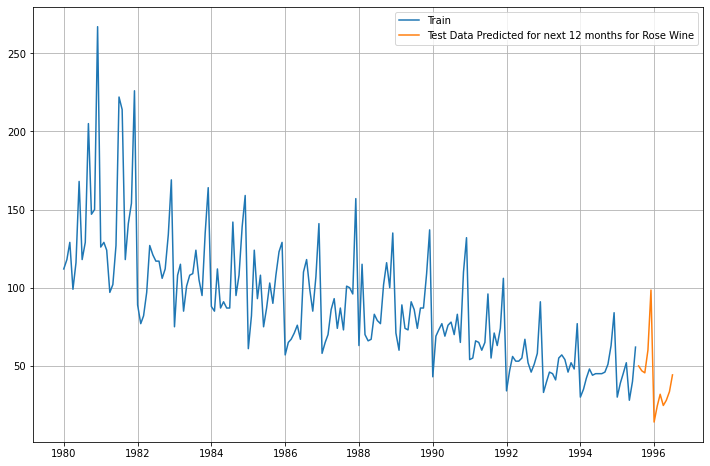

In [161]:
plt.plot(Rose_ForFullData_Train , label = "Train")
plt.plot(EXS_Rose_Predict , label = "Test Data Predicted for next 12 months for Rose Wine")
plt.legend(loc = "best")
plt.grid()